In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import wandb

In [7]:
mydata = pd.read_csv('/Users/anastasia/Dropbox/regression_so_samples_allsbjs_fixed.csv')

In [3]:
pd.options.display.max_rows = 15

In [4]:
mydata

,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,FC_LocalSimple_mean3_stderr,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,"Monophasic_vertices_count,","Biphasic_vertices_count,","Sleep_spindles_count,","K_complex_count,",O-information,S-information
0,30.0,2,83,0,0,-2.445233,-3.155950,-2.710832,-2.962410,-4.462281,...,0.336799,0.316177,0.316998,0.660012,0.0,0.0,2.000000,0.0,NaN,NaN
1,29.9,2,83,0,0,-3.324564,-3.857711,-3.775982,-4.076556,-5.188734,...,0.539413,0.515705,0.532923,0.645414,0.0,0.0,0.333333,0.0,-0.000281,0.010573
2,29.8,2,83,0,0,-2.219338,-2.767709,-2.312887,-3.297628,-4.449349,...,0.287693,0.305671,0.334226,0.720780,0.0,0.0,0.500000,0.0,NaN,NaN
3,29.7,2,83,0,0,-2.727042,-3.262588,-2.936053,-3.311534,-4.602471,...,0.328391,0.316754,0.310106,0.680707,0.0,0.0,1.000000,0.0,NaN,NaN
4,29.6,2,83,0,0,-2.480271,-2.864198,-2.560953,-3.247082,-4.445265,...,0.270287,0.285799,0.272204,0.673053,0.0,0.0,1.000000,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175295,0.5,6811,79,1,1,-2.126810,-3.238122,-3.083983,-3.779917,-4.873306,...,0.132739,0.187623,0.148162,0.900491,0.0,0.0,0.500000,0.0,NaN,NaN
175296,0.4,6811,79,1,1,-4.225398,-6.021411,-6.309019,-7.301486,-9.633378,...,0.412933,0.448138,0.423812,1.977827,0.0,0.0,0.000000,0.0,-0.000735,0.254520
175297,0.3,6811,79,1,1,-2.096831,-3.002711,-3.164180,-3.704596,-4.731842,...,0.175018,0.184974,0.168836,0.948615,0.0,0.0,0.500000,0.0,NaN,NaN
175298,0.2,6811,79,1,1,-1.937574,-2.779680,-2.905882,-3.720251,-4.727719,...,0.163801,0.226120,0.182618,0.892886,0.0,0.0,1.000000,0.0,NaN,NaN


In [5]:
mydata.isnull().sum()

Label                            0
Sbj_ID                           0
Age                              0
ifCleanOnset                     0
SleepStage                       0
                             ...  
Biphasic_vertices_count,    105784
Sleep_spindles_count,       105784
K_complex_count,            105784
O-information               137816
S-information               137816
Length: 72, dtype: int64

In [6]:
mydata['count'] = mydata.isnull().sum(axis=1) // 61

In [7]:
mydata_disp = mydata[mydata['count'] > 0]
mydata_disp

,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,"Monophasic_vertices_count,","Biphasic_vertices_count,","Sleep_spindles_count,","K_complex_count,",O-information,S-information,count
5,29.5,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,29.2,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,29.1,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,29.0,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
12,28.8,2,83,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175280,2.0,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
175281,1.9,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
175282,1.8,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
175283,1.7,6811,79,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [8]:
# Get the number of unique subjects 

mydata['Sbj_ID'].nunique()

668

In [9]:
# in each subject wiht NaNs, calculate the maximum number of consecutive NaNs (sum of rows of 'count' column)
# NaNs are consecutive if the 'Label' values between two rows are different for no more than 0.11
sbjs = mydata_disp['Sbj_ID'].unique()
max_consec_nans = []
all_consec_nans_per_sbj = {} # list of lists of consecutive NaNs for each subject
for num_sbj, sbj in enumerate(sbjs):
    consec_nan_for_sbj = []
    max_consec = 1
    consec_nan = []
    for i in range(len(mydata_disp[mydata_disp['Sbj_ID'] == sbj]) - 1):
        diff = abs(mydata_disp[mydata_disp['Sbj_ID'] == sbj].iloc[i]['Label'] - mydata_disp[mydata_disp['Sbj_ID'] == sbj].iloc[i+1]['Label'])
        if diff < 0.11:
            consec_nan.append(i)
            max_consec = max([len(consec_nan), max_consec])
        # if the difference between two consecutive labels is more than 0.11, they are not consecutive NaNs. Reset the list of consecutive NaNs
        else:
            if len(consec_nan) > 0:
                consec_nan_for_sbj.append(len(consec_nan))
                consec_nan = []
    max_consec_nans.append(max_consec)
    all_consec_nans_per_sbj[sbj] = consec_nan_for_sbj
max_consec_nans


[65,
 44,
 31,
 73,
 13,
 173,
 69,
 33,
 19,
 39,
 44,
 52,
 59,
 204,
 6,
 18,
 11,
 54,
 85,
 53,
 102,
 24,
 130,
 41,
 40,
 24,
 44,
 72,
 43,
 129,
 31,
 39,
 100,
 75,
 20,
 69,
 29,
 61,
 159,
 31,
 48,
 3,
 18,
 21,
 86,
 35,
 16,
 58,
 119,
 6,
 36,
 20,
 84,
 27,
 34,
 67,
 46,
 44,
 39,
 71,
 34,
 40,
 79,
 35,
 45,
 80,
 45,
 67,
 4,
 80,
 6,
 29,
 4,
 1,
 25,
 49,
 58,
 113,
 1,
 59,
 74,
 6,
 15,
 60,
 52,
 70,
 170,
 19,
 13,
 16,
 70,
 234,
 110,
 24,
 16,
 29,
 54,
 78,
 44,
 89,
 69,
 66,
 120,
 9,
 136,
 43,
 84,
 95,
 25,
 7,
 83,
 21,
 9,
 60,
 5,
 224,
 54,
 24,
 64,
 24,
 15,
 10,
 66,
 116,
 47,
 33,
 45,
 151,
 90,
 72,
 44,
 24,
 11,
 60,
 65,
 37,
 171,
 44,
 11,
 11,
 1,
 1,
 9,
 28,
 79,
 50,
 76,
 13,
 17,
 27,
 12,
 76,
 21,
 17,
 20,
 19,
 59,
 49,
 64,
 40,
 17,
 14,
 15,
 139,
 124,
 21,
 91,
 49,
 64,
 76,
 146,
 127,
 61,
 37,
 69,
 42,
 53,
 55,
 83,
 11,
 36,
 54,
 41,
 98,
 20,
 155,
 19,
 112,
 20,
 24,
 29,
 13,
 14,
 19,
 19,
 54,
 4,
 30,
 58

In [10]:
# for each subject in the dictionary, sort the list of consecutive NaNs in descending order
for sbj in all_consec_nans_per_sbj:
    all_consec_nans_per_sbj[sbj].sort(reverse=True)

all_consec_nans_per_sbj

{2: [65,
  16,
  16,
  10,
  5,
  5,
  5,
  5,
  5,
  4,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 6: [44, 14, 13, 10, 10, 10, 8, 5, 4, 2, 2, 1, 1, 1, 1],
 10: [31,
  7,
  4,
  4,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 12: [73, 26, 21, 17, 10, 6, 5, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1],
 35: [7,
  6,
  6,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  4,
  4,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 54: [173, 8, 5, 4, 3, 3, 2, 1],
 56: [69, 41, 29, 25, 10, 9, 5, 1, 1, 1, 1],
 77: [33,
  25,
  24,
  10,
  9,
  9,
  7,
  7,
  4,
  4,
  4,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 99: [19, 14, 14, 9, 9, 6, 5, 5, 5, 4, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1],
 105: [39, 25, 19, 17, 16, 6, 6, 4, 4, 2, 1, 1, 1],
 107: [44, 19, 19, 8, 5, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 110: [

In [11]:
# Write a function to display the subjects for a chosen feature

import random
#
def show_feature_for_ransom_subjects(mydata, feature_name, num_sbjs, random_seed = 42):
    counter = 0
    subjects = mydata['Sbj_ID'].unique()
    random.seed(random_seed)
    random.shuffle(subjects)
    for i in subjects:
        counter = counter + 1
        if counter < num_sbjs:
            print('Sbj ID: ', i)
            # Also show Nans in the plot
        
            sns.pairplot(mydata[mydata['Sbj_ID'] == i], x_vars=['Label'], y_vars=[feature_name], height=5, aspect=1, kind='reg')
            
            plt.show()
        else:
            continue

Sbj ID:  3399


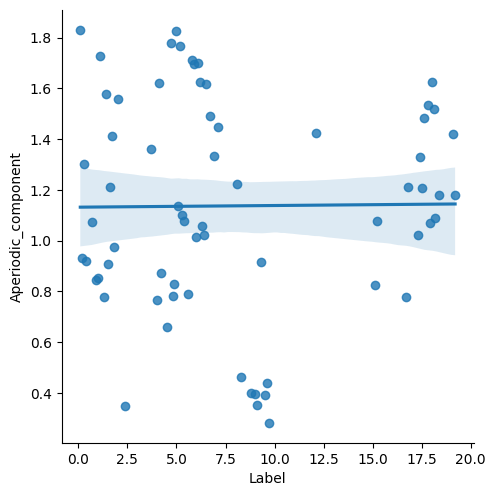

Sbj ID:  2887


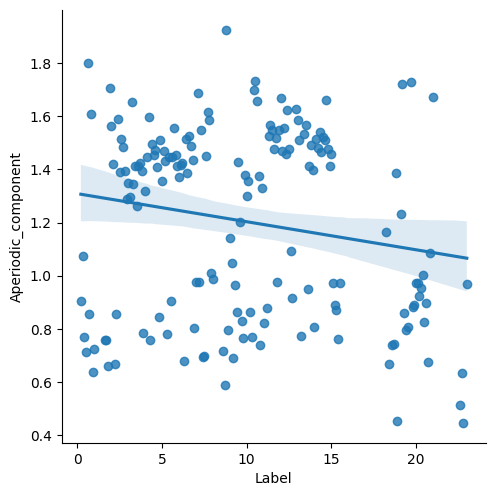

Sbj ID:  6351


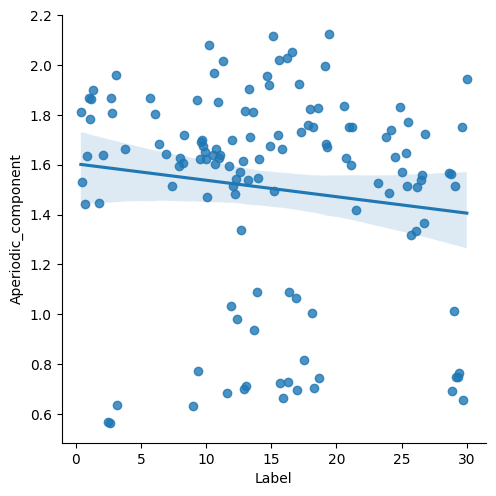

Sbj ID:  1256


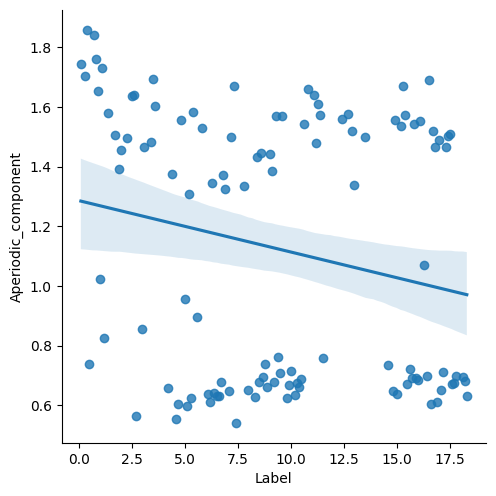

In [12]:
# Try it on the 'Aperiodic_component' feature
show_feature_for_ransom_subjects(mydata, 'Aperiodic_component', 5)

Sbj ID:  3399


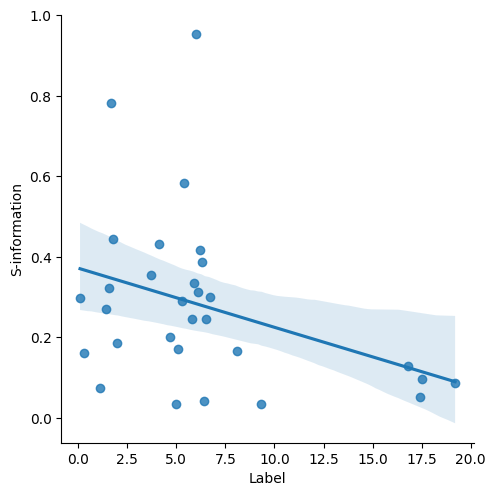

Sbj ID:  2887


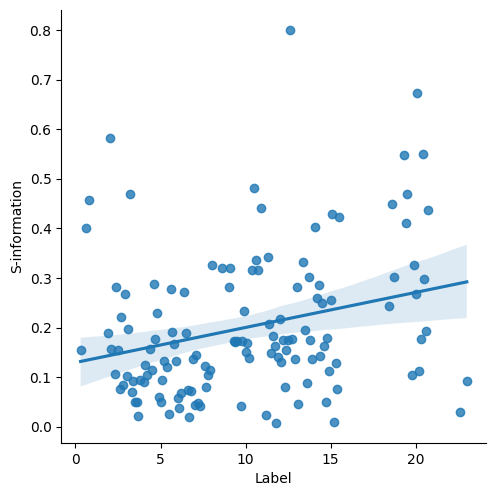

Sbj ID:  6351


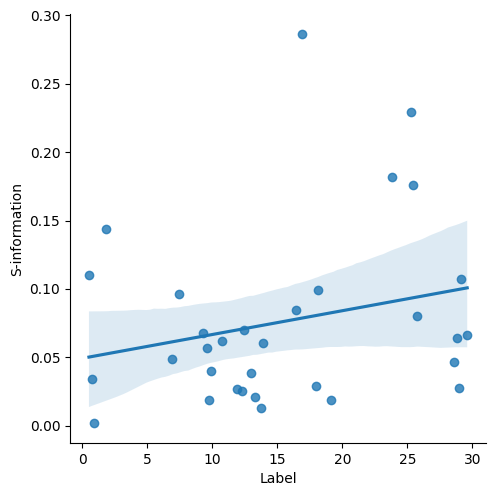

Sbj ID:  1256


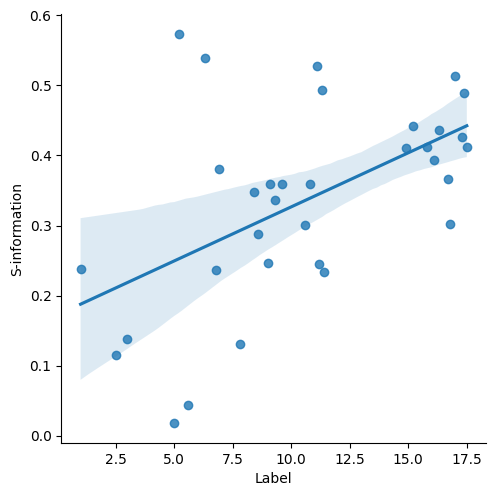

Sbj ID:  4888


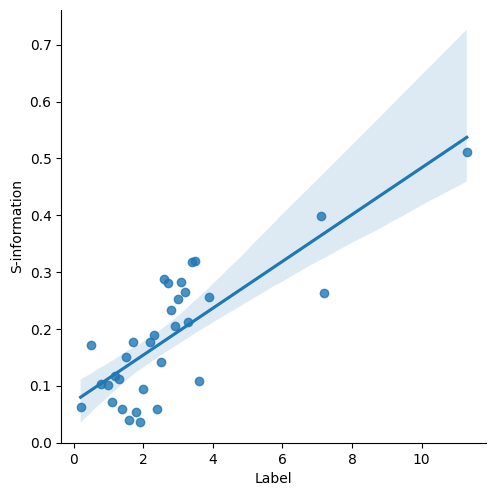

Sbj ID:  3021


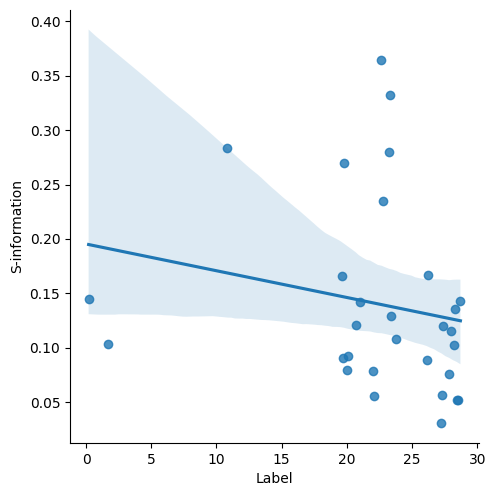

Sbj ID:  4715


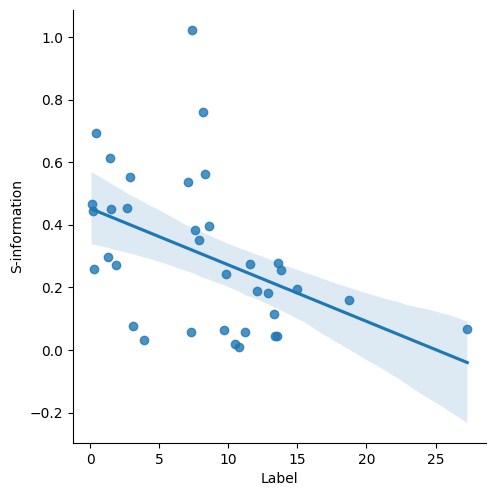

Sbj ID:  3267


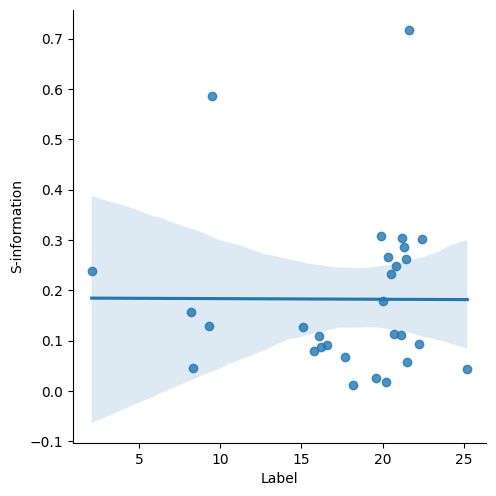

Sbj ID:  10


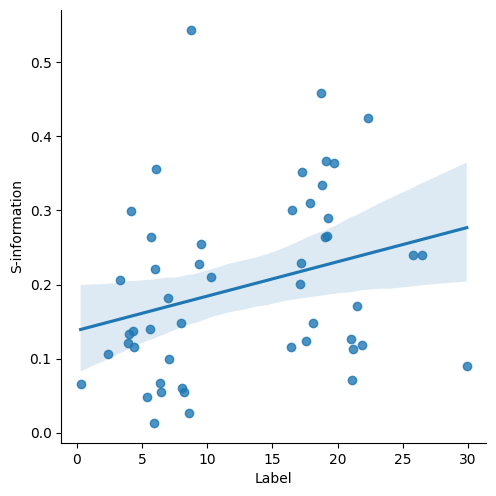

In [13]:
# Try it on the 'Aperiodic_component' feature
show_feature_for_ransom_subjects(mydata, 'S-information', 10)

In [14]:
# introduce a datetime index column from the 'label' column
mydata['datetime'] = pd.to_datetime(mydata['Label']*60, unit='s')

In [15]:
# For each subject, apply linear interpolation to fill in the NaNs unless the number of consecutive NaNs is more than 10

mydata_interp = mydata.copy()
mydata_interp = mydata_interp.drop(['datetime'], axis=1)
mydata_interp = mydata_interp.interpolate(method='linear', limit = 10, limit_direction='both')




Sbj ID:  3399


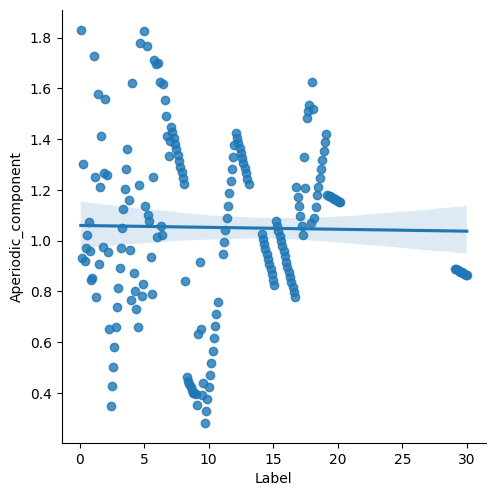

Sbj ID:  2887


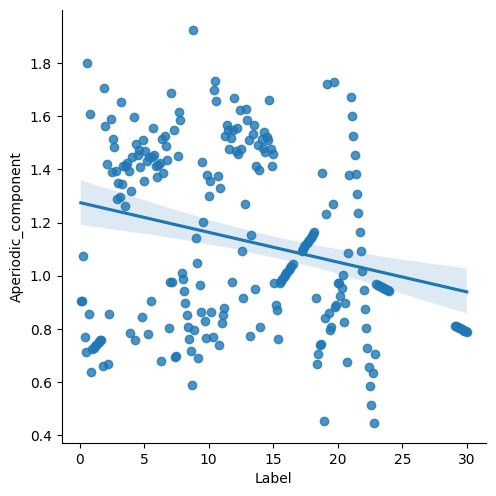

Sbj ID:  6351


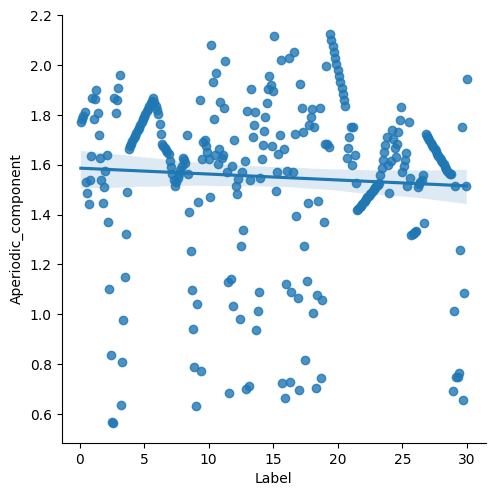

Sbj ID:  1256


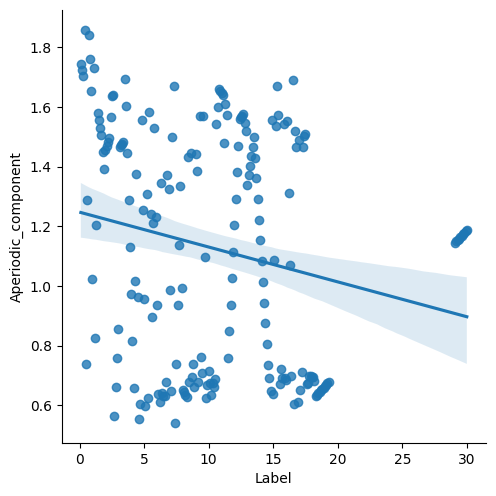

In [16]:
# show the same subjects as before but now with interpolated data
show_feature_for_ransom_subjects(mydata_interp, 'Aperiodic_component', 5)

In [17]:
mydata_interp_time = mydata.copy()
mydata_interp_time = mydata_interp_time.interpolate(method='bfill',limit = 30, limit_direction='backward')


Sbj ID:  3399


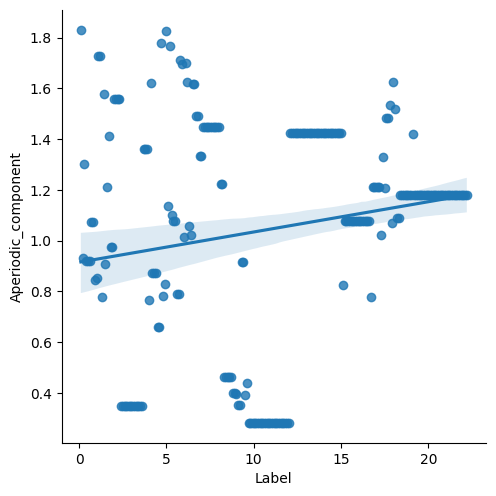

Sbj ID:  2887


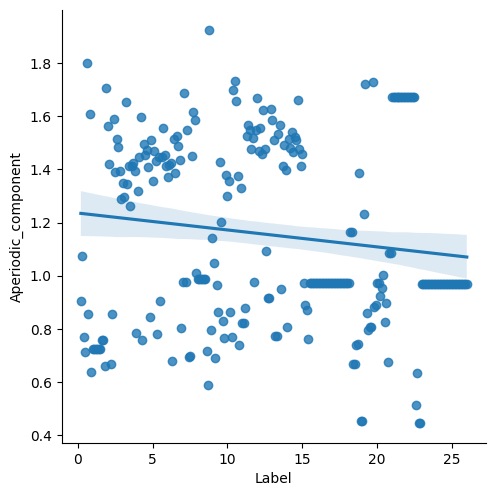

Sbj ID:  6351


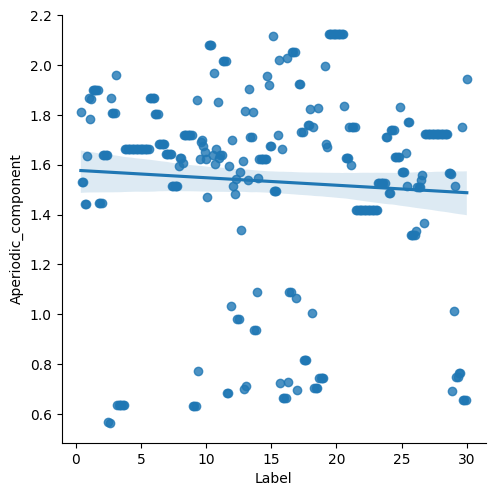

Sbj ID:  1256


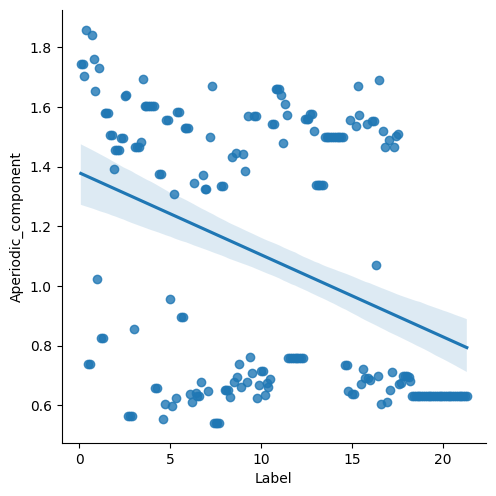

In [18]:
# show the same subjects as before but now with interpolated data
show_feature_for_ransom_subjects(mydata_interp_time, 'Aperiodic_component', 5)

In [19]:
# 

## Try models that uses missing indicator values and Last Observation Carried Forward (LOCF) aka forward fill ##

In [20]:
import numpy as np
import pandas as pd

# create a missing mask (column) fthat would indicate whether the values in any of the columns of mydata are missing
# 1 indicates missing, 0 indicates not missing

missing_mask = mydata.isnull().sum(axis=1).astype(bool).astype(int)

missing_mask.sum()


137816

In [21]:
mydata.fillna(method='ffill', inplace=True) # forward fill as an example

# Concatenating the missing value flags to the DataFrame
df = pd.concat([mydata, missing_mask.rename("column_missing")], axis=1)

In [22]:
#Show where the dataframe that still have missing values using isnull()

df[df.isnull().any(axis=1)]



,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,Aperiodic_component,"Monophasic_vertices_count,","Biphasic_vertices_count,","Sleep_spindles_count,","K_complex_count,",O-information,S-information,count,datetime,column_missing
0,30.0,2,83,0,0,-2.445233,-3.15595,-2.710832,-2.96241,-4.462281,...,0.660012,0.0,0.0,2.0,0.0,NaN,NaN,0,1970-01-01 00:30:00,1


In [23]:
df.drop(['datetime', 'count'], axis=1, inplace=True)

In [24]:
df.dropna(inplace=True)

In [25]:
df


,Label,Sbj_ID,Age,ifCleanOnset,SleepStage,delta_power,theta_power,alpha_power,beta_power,gamma_power,...,Entropy_Rate_CTW,Entropy_Rate_LZ,Aperiodic_component,"Monophasic_vertices_count,","Biphasic_vertices_count,","Sleep_spindles_count,","K_complex_count,",O-information,S-information,column_missing
1,29.9,2,83,0,0,-3.324564,-3.857711,-3.775982,-4.076556,-5.188734,...,0.515705,0.532923,0.645414,0.0,0.0,0.333333,0.0,-0.000281,0.010573,0
2,29.8,2,83,0,0,-2.219338,-2.767709,-2.312887,-3.297628,-4.449349,...,0.305671,0.334226,0.720780,0.0,0.0,0.500000,0.0,-0.000281,0.010573,1
3,29.7,2,83,0,0,-2.727042,-3.262588,-2.936053,-3.311534,-4.602471,...,0.316754,0.310106,0.680707,0.0,0.0,1.000000,0.0,-0.000281,0.010573,1
4,29.6,2,83,0,0,-2.480271,-2.864198,-2.560953,-3.247082,-4.445265,...,0.285799,0.272204,0.673053,0.0,0.0,1.000000,0.0,-0.000281,0.010573,1
5,29.5,2,83,0,0,-2.480271,-2.864198,-2.560953,-3.247082,-4.445265,...,0.285799,0.272204,0.673053,0.0,0.0,1.000000,0.0,-0.000281,0.010573,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175295,0.5,6811,79,1,1,-2.126810,-3.238122,-3.083983,-3.779917,-4.873306,...,0.187623,0.148162,0.900491,0.0,0.0,0.500000,0.0,-0.056656,0.633119,1
175296,0.4,6811,79,1,1,-4.225398,-6.021411,-6.309019,-7.301486,-9.633378,...,0.448138,0.423812,1.977827,0.0,0.0,0.000000,0.0,-0.000735,0.254520,0
175297,0.3,6811,79,1,1,-2.096831,-3.002711,-3.164180,-3.704596,-4.731842,...,0.184974,0.168836,0.948615,0.0,0.0,0.500000,0.0,-0.000735,0.254520,1
175298,0.2,6811,79,1,1,-1.937574,-2.779680,-2.905882,-3.720251,-4.727719,...,0.226120,0.182618,0.892886,0.0,0.0,1.000000,0.0,-0.000735,0.254520,1


Sbj ID:  3399


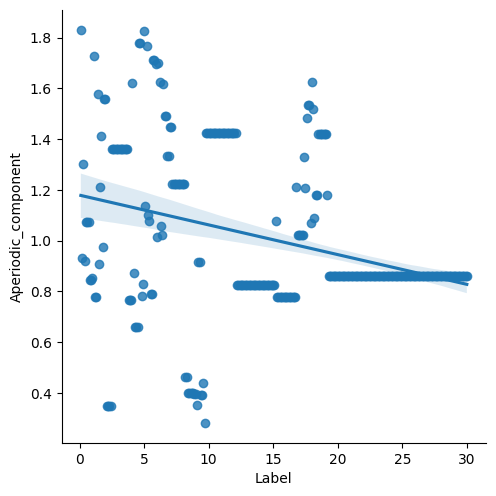

Sbj ID:  2887


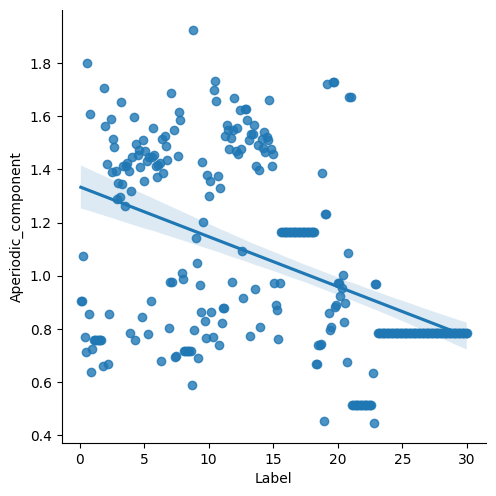

Sbj ID:  6351


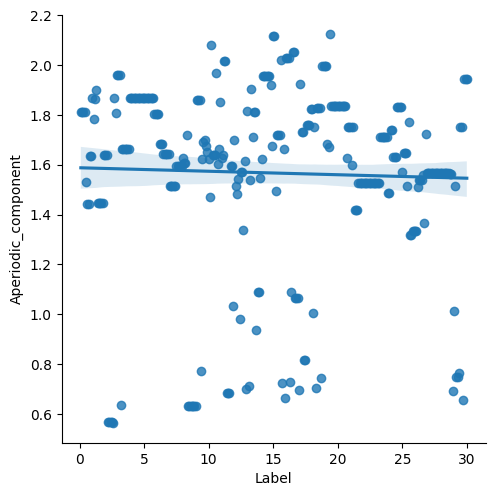

Sbj ID:  1256


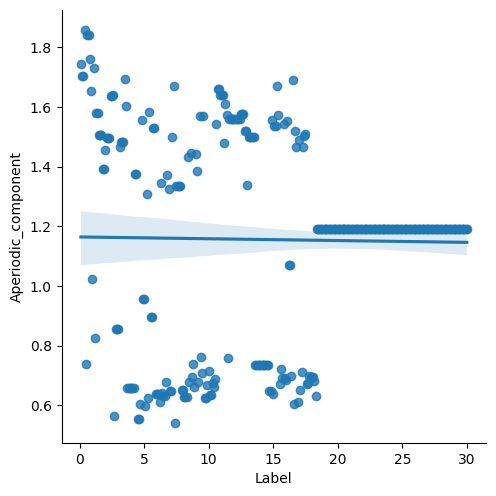

In [26]:
# show the same subjects as before but now with interpolated data
show_feature_for_ransom_subjects(df, 'Aperiodic_component', 5)

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
# Create a PyTorch dataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class SleepDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return torch.from_numpy(self.sequences[idx]).float(), torch.from_numpy(np.array(self.labels[idx])).float()

In [5]:
# Create a function for creating sliding windows of selected length 

def create_sliding_windows(data,  window_size_minutes=5, random_seed = 42):

    # Assert whether therea are any NaNs in the data
    assert data.isnull().sum().sum() == 0, "There are NaNs in the data"

    # Create a list of all unique subjects
    subjects = data['Sbj_ID'].unique()


    # Randomly select some of the 80% of subjects to be in the training set, 20% to the validation set and 20% in the test set
    np.random.seed(random_seed)
    train_subjects = np.random.choice(subjects, size=int(0.6*len(subjects)), replace=False)
    val_subjects = np.random.choice(np.setdiff1d(subjects, train_subjects), size=int(0.2*len(subjects)), replace=False)
    test_subjects = np.setdiff1d(subjects, np.concatenate((train_subjects, val_subjects)))
   
    
    # Create a new column in the dataframe that indicates whether the subject is in the training set, val set or the test set
    data['Set'] = 'train'
    data.loc[data['Sbj_ID'].isin(val_subjects), 'Set'] = 'val'
    data.loc[data['Sbj_ID'].isin(test_subjects), 'Set'] = 'test'

    # Sort your dataframe by Sbj_ID if not already sorted
    data = data.sort_values('Sbj_ID')

    # Convert the window size from minutes to 6-second epochs
    window_size = int((window_size_minutes*60)/6)

    # Create empty lists to store your sequences and labels
    train_sequences = []
    train_labels = []
    val_sequences = []
    val_labels = []
    test_sequences = []
    test_labels = []

    # Group the DataFrame by subject ID and iterate over each group, dividing into training and test sets
    for _, group in data.groupby('Sbj_ID'):
        
        # For each group, get the feature columns and convert them into numpy array
        group_features = group.drop(['Sbj_ID', 'Label', 'ifCleanOnset', 'SleepStage', 'Set'], axis=1).to_numpy()

        train_test = group['Set'].iloc[0]
        
        if window_size == len(group_features):
            if train_test == 'train':
                print('got here')
                train_sequences.append(group_features)
                train_labels.append(group['Label'].iloc[0])
            elif train_test == 'val':
                val_sequences.append(group_features)
                val_labels.append(group['Label'].iloc[0])
            elif train_test == 'test':
                test_sequences.append(group_features)
                test_labels.append(group['Label'].iloc[0])
        elif window_size > len(group_features):
            continue


        # Iterate over the group array with a sliding window
        for i in range(len(group_features) - window_size):
            

            if train_test == 'train':

                # Append the window data to your sequences
                train_sequences.append(group_features[i : i + window_size])

                # Append the label corresponding to the end of the window
                train_labels.append(group['Label'].iloc[i + window_size])

            
            elif train_test == 'val':
                # Append the window data to your sequences
                val_sequences.append(group_features[i : i + window_size])

                # Append the label corresponding to the end of the window
                val_labels.append(group['Label'].iloc[i + window_size])

            elif train_test == 'test':
                # Append the window data to your sequences
                test_sequences.append(group_features[i : i + window_size])

                # Append the label corresponding to the end of the window
                test_labels.append(group['Label'].iloc[i + window_size])
            
    # Convert the sequences and labels into numpy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)
    val_sequences = np.array(val_sequences)
    val_labels = np.array(val_labels)
    test_sequences = np.array(test_sequences)
    test_labels = np.array(test_labels)

    return train_sequences, train_labels, val_sequences, val_labels, test_sequences, test_labels




In [6]:
class SleepOnsetRNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, output_size=1, dropout=0.0, l2=0.0):
        super(SleepOnsetRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.l2 = l2

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])

        # L2 regularization
        l2_reg = torch.tensor(0.).to(device)
        for param in self.parameters():
            l2_reg += torch.norm(param)

        return out + self.l2 * l2_reg

In [32]:
def train(model, train_loader, val_loader, num_epochs, criterion, optimizer, device, ifoutputpredictions):

    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):

        # Train the model
        model.train()
        for i, (inputs, labels) in enumerate(train_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
        
            loss = criterion(outputs, labels.view(-1, 1))

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validate the model
        model.eval()
        with torch.no_grad():
            val_loss = 0
            predictions, actuals = [], []
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                val_loss += criterion(outputs, labels.view(-1, 1)).item()

                

                predictions.append(outputs.cpu().numpy())
                actuals.append(labels.cpu().numpy())
            
            
           
            print('-'*100)
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Validation Loss: {val_loss/len(val_loader)}')

        # Save the model training and validation losses for plotting 
        train_losses.append(loss.item())
        val_losses.append(val_loss/len(val_loader))

        # Calculate the mape, mae, and accuracy for the validation set
        predictions = np.concatenate(predictions)
        actuals = np.concatenate(actuals)
        mape = np.mean(np.abs(predictions - actuals)/actuals) * 100
        mae = np.mean(np.abs(predictions - actuals))
        # calculate accuracy in percentage
        accuracy = 100 - np.mean(mape)
      
        print('-'*100 )
        print(f'Validation MAPE: {mape}, Validation MAE: {mae}, Validation Accuracy: {accuracy}')
        print('-'*100 + '\n')

        
        last_predictions = predictions
    if ifoutputpredictions: 
        return train_losses, val_losses, model, accuracy, mape, mae, predictions, actuals
    else:    
        return train_losses, val_losses, model, accuracy, mape, mae
# test the trained model

def test(model, test_loader, device, criterion):
    model.eval()
    predictions, actuals = [], []
    with torch.no_grad():
        test_loss = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            test_loss += criterion(outputs, labels.view(-1, 1)).item()

            predictions.append(outputs.cpu().numpy())
            actuals.append(labels.cpu().numpy())

        print(f'Test Loss: {test_loss/len(test_loader)}')

    return np.concatenate(predictions), np.concatenate(actuals)


In [33]:
def evaluate_performance_test(predictions, y_test):

    errors = abs(y_test - predictions)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    mse = sklearn.metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = sklearn.metrics.r2_score(y_test, predictions)


    print('Mean Absolute Error:', round(np.mean(errors), 2))
    print('Accuracy:', round(accuracy, 2), '%.')
    print('Mean Squared Error:', round(mse, 2))
    print('Root Mean Squared Error:', round(rmse, 2))
    print('R2:', round(r2, 2))


    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual time to sleep onset')
    plt.ylabel('Predicted time to sleep onset')
    plt.title('Actual vs Predicted time to sleep onset')
    plt.show()

    #residuals = y_test - predictions
    #plt.scatter(y_test, residuals)
    #plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=1)
    #plt.xlabel('Actual time to sleep onset')
    #plt.ylabel('Residuals')
    #plt.title('Actual vs Residuals')
    #plt.show()

    plt.hist(residuals)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Residuals distribution')
    plt.show()

    return predictions, errors, mape, accuracy, residuals

In [34]:
def training_loop_feature_RNN(mydata, input_size, num_epochs, hidden_size, num_layers, dropout, l2, lr, weight_decay, batch_size, device, random_seed = 42, window_size_minutes = 1, iftest = 0, ifoutputpredictions = 0):

    train_sequences, train_labels, val_sequences, val_labels, test_sequences, test_labels = create_sliding_windows(mydata, window_size_minutes, random_seed)
    

    # Initialize the scaler
    scaler = StandardScaler()

    # Scale each sequence individually, excluding the first feature
    train_sequences_scaled = np.array([np.concatenate([seq[:, :1], scaler.fit_transform(seq[:, 1:])], axis=-1) for seq in train_sequences])
    val_sequences_scaled = np.array([np.concatenate([seq[:, :1], scaler.transform(seq[:, 1:])], axis=-1) for seq in val_sequences])
    test_sequences_scaled = np.array([np.concatenate([seq[:, :1], scaler.transform(seq[:, 1:])], axis=-1) for seq in test_sequences])


    # Convert the numpy arrays into PyTorch tensors
    #train_sequences_scaled = torch.from_numpy(train_sequences_scaled).float()
    #train_labels = torch.from_numpy(train_labels).float()
    #val_sequences_scaled = torch.from_numpy(val_sequences_scaled).float()
    #val_labels = torch.from_numpy(val_labels).float()
    #test_sequences_scaled = torch.from_numpy(test_sequences_scaled).float()
    #test_labels = torch.from_numpy(test_labels).float()

    # Create the training, validation and test sets
    train_dataset = SleepDataset(train_sequences_scaled, train_labels)
    val_dataset = SleepDataset(val_sequences_scaled, val_labels)
    test_dataset = SleepDataset(test_sequences_scaled, test_labels)

    # Create the training, validation and test loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # show size of the test loader
    # Initialize the model
    model = SleepOnsetRNN(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, dropout=dropout, l2=l2).to(device)

    # Define the loss function
    criterion = nn.MSELoss()

    # Define the optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Empty lists to store training and validation losses
    train_losses = []
    val_losses = []

    # Train the model
    if ifoutputpredictions:
        train_losses, val_losses, model, accuracy, mape, mae, last_predictions, last_actuals  = train(model, train_loader, val_loader, num_epochs=num_epochs, criterion=criterion, optimizer=optimizer, device=device, ifoutputpredictions = ifoutputpredictions)
    else: 
        train_losses, val_losses, model, accuracy, mape, mae = train(model, train_loader, val_loader, num_epochs=num_epochs, criterion=criterion, optimizer=optimizer, device=device, ifoutputpredictions = ifoutputpredictions)
    # plot the training and validation losses

    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.legend()
    plt.show()

    # test the trained model
    if iftest == 1:

        predictions, actuals = test(model, test_loader, device, criterion)
        predictions, errors, mape, accuracy, residuals = evaluate_performance_test(predictions, actuals)    
    
        return train_losses, val_losses, predictions, actuals, errors, mape, accuracy, residuals, model
    else:
        if ifoutputpredictions:
            return train_losses, val_losses, model, accuracy, mape, mae, last_predictions, last_actuals
        else:
            return train_losses, val_losses, model, accuracy, mape, mae



----------------------------------------------------------------------------------------------------
Epoch 1/10, Loss: 40.96309280395508, Validation Loss: 104.16470569583167
----------------------------------------------------------------------------------------------------
Validation MAPE: 226.51779651641846, Validation MAE: 9.499674797058105, Validation Accuracy: -126.51779651641846
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
Epoch 2/10, Loss: 27.657514572143555, Validation Loss: 104.46845700519275
----------------------------------------------------------------------------------------------------
Validation MAPE: 254.3896198272705, Validation MAE: 9.476834297180176, Validation Accuracy: -154.3896198272705
----------------------------------------------------------------------------------------------------

---------------------

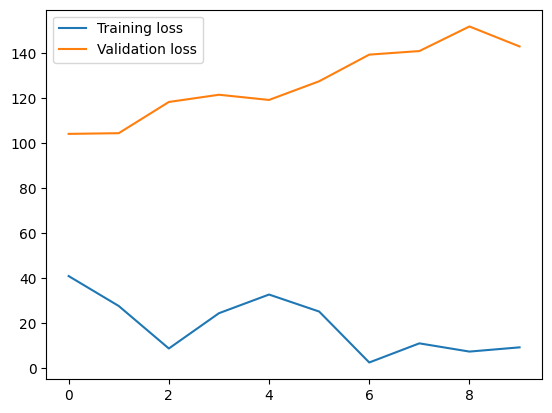

Test Loss: 137.20719650266457


NameError: name 'sklearn' is not defined

In [35]:
train_losses, val_losses, predictions, actuals, errors, mape, accuracy, residuals, model = training_loop_feature_RNN(df, input_size = 69, num_epochs=10, hidden_size=128, num_layers=2, dropout=0.0, l2=0.0, lr=0.001, weight_decay=0.0, batch_size=32, device=device, random_seed=42, window_size_minutes=5, iftest=1, ifoutputpredictions=0)

## Try to get a lower-dimensional represenation with Autoencoders ##

In [248]:
# Create a function for creating sliding windows of selected length 

def create_sliding_windows_VAE(data, window_size_minutes= 30, random_seed = 42):

    # Assert whether therea are any NaNs in the data
    assert data.isnull().sum().sum() == 0, "There are NaNs in the data"

    # Create a list of all unique subjects
    subjects = data['Sbj_ID'].unique()


    # Randomly select some of the 80% of subjects to be in the training set, 20% to the validation set and 20% in the test set
    np.random.seed(random_seed)
    train_subjects = np.random.choice(subjects, size=int(0.6*len(subjects)), replace=False)
    val_subjects = np.random.choice(np.setdiff1d(subjects, train_subjects), size=int(0.2*len(subjects)), replace=False)
    test_subjects = np.setdiff1d(subjects, np.concatenate((train_subjects, val_subjects)))
   
    
    # Create a new column in the dataframe that indicates whether the subject is in the training set, val set or the test set
    data['Set'] = 'train'
    data.loc[data['Sbj_ID'].isin(val_subjects), 'Set'] = 'val'
    data.loc[data['Sbj_ID'].isin(test_subjects), 'Set'] = 'test'

    # Sort your dataframe by Sbj_ID if not already sorted
    data = data.sort_values('Sbj_ID')


    # Convert the window size from minutes to 6-second epochs
    window_size = int((window_size_minutes*60)/6)

    # Create empty lists to store your sequences and labels
    train_sequences = []
    train_labels = []
    val_sequences = []
    val_labels = []
    test_sequences = []
    test_labels = []

    # Group the DataFrame by subject ID and iterate over each group, dividing into training and test sets
    for sbj_id, group in data.groupby('Sbj_ID'):

        #Sort the group by the label column (so it's descending)
        group = group.sort_values('Label', ascending=False)

        # For each group, get the feature columns and convert them into numpy array
        group_features = group.drop(['Sbj_ID', 'Label', 'ifCleanOnset', 'SleepStage', 'Set'], axis=1).to_numpy()

        train_test = group['Set'].iloc[0]
        
        if window_size == len(group_features):
            if train_test == 'train':
                train_sequences.append(group_features)
                train_labels.append(sbj_id)
            elif train_test == 'val':
                val_sequences.append(group_features)
                val_labels.append(sbj_id)
            elif train_test == 'test':
                test_sequences.append(group_features)
                test_labels.append(sbj_id)
        elif window_size > len(group_features):
            continue
        else:

            if train_test == 'train':

                # extract from the end of the sequneces the window size of data
                train_sequences.append(group_features[-window_size:])
               
                # Append the label corresponding to the end of the window
                train_labels.append(sbj_id)

            
            elif train_test == 'val':
                # Append the window data to your sequences
                val_sequences.append(group_features[-window_size:])

                # Append the label corresponding to the end of the window
                val_labels.append(sbj_id)

            elif train_test == 'test':
                # Append the window data to your sequences
                test_sequences.append(group_features[-window_size:])

                # Append the label corresponding to the end of the window
                test_labels.append(sbj_id)
            
    # Convert the sequences and labels into numpy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)
    val_sequences = np.array(val_sequences)
    val_labels = np.array(val_labels)
    test_sequences = np.array(test_sequences)
    test_labels = np.array(test_labels)

    return train_sequences, train_labels, val_sequences, val_labels, test_sequences, test_labels

In [11]:
df_for_encoding = mydata.copy()

In [12]:
df_for_encoding.fillna(method='ffill', inplace=True)

In [13]:
df_for_encoding.fillna(method = 'bfill', inplace = True)

In [14]:
df_for_encoding.isnull().sum()

Label                       0
Sbj_ID                      0
Age                         0
ifCleanOnset                0
SleepStage                  0
                           ..
Biphasic_vertices_count,    0
Sleep_spindles_count,       0
K_complex_count,            0
O-information               0
S-information               0
Length: 72, dtype: int64

In [16]:
df_for_encoding.columns

Index(['Label', 'Sbj_ID', 'Age', 'ifCleanOnset', 'SleepStage', 'delta_power',
       'theta_power', 'alpha_power', 'beta_power', 'gamma_power',
       'Delta_to_theta_ratio', 'Delta_to_alpha_ratio', 'Delta_to_beta_ratio',
       'Delta_to_gamma_ratio', 'Theta_to_alpha_ratio', 'Theta_to_beta_ratio',
       'Theta_to_gamma_ratio', 'Alpha_to_beta_ratio', 'Alpha_to_gamma_ratio',
       'Beta_to_gamma_ratio', 'Transition_power_ratio',
       'Peak_delta_band_frequency', 'Peak_theta_band_frequency',
       'Peak_alpha_band_frequency', 'Peak_beta_band_frequency',
       'Peak_gamma_band_frequency', 'Temporal_coherence_delta_band',
       'Temporal_coherence_theta_band', 'Temporal_coherence_alpha_band',
       'Temporal_coherence_beta_band', 'Temporal_coherence_gamma_band',
       'Phase_amplitude_coupling_DT', 'Phase_amplitude_coupling_DA',
       'Phase_amplitude_coupling_DB', 'Phase_amplitude_coupling_DG',
       'Phase_amplitude_coupling_TA', 'Phase_amplitude_coupling_TB',
       'Phase_am

In [17]:
missing_mask = mydata.isnull().sum(axis=1).astype(bool).astype(int)
df_for_encoding['missing'] = missing_mask

In [19]:
# show how many missing values are there in each row
df_for_encoding['missing'].value_counts()

missing
1    137816
0     37484
Name: count, dtype: int64

In [73]:
# delete 'count', 'datetime' columns 
df_for_encoding.drop(['count', 'datetime'], axis=1, inplace=True)

In [48]:
# Create the dataset from the dataframe
train_sequences_vae, train_labels_vae, val_sequences_vae, val_labels_vae, test_sequences_vae, test_labels_vae = create_sliding_windows_VAE(df_for_encoding, window_size_minutes=30, random_seed=42)


In [49]:
train_sequences_vae.shape

(288, 300, 69)

In [177]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the training data
# We're assuming here that your training data is a 3D array with shape 
# (number_of_sequences, sequence_length, number_of_features)
# and that you want to scale the data across all sequences and time steps, but not across features.
scaler.fit(train_sequences_vae.reshape(-1, train_sequences_vae.shape[-1]))

# Use the scaler to transform the train, validation, and test data
train_sequences_scaled_vae = scaler.transform(train_sequences_vae.reshape(-1, train_sequences_vae.shape[-1])).reshape(train_sequences_vae.shape)
val_sequences_scaled_vae = scaler.transform(val_sequences_vae.reshape(-1, val_sequences_vae.shape[-1])).reshape(val_sequences_vae.shape)
test_sequences_scaled_vae = scaler.transform(test_sequences_vae.reshape(-1, test_sequences_vae.shape[-1])).reshape(test_sequences_vae.shape)

In [166]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Initialize the arrays to hold the scaled sequences
train_sequences_scaled_vae = []
val_sequences_scaled_vae = []
test_sequences_scaled_vae = []

# Scale each sequence individually, excluding the first feature
for seq in train_sequences_vae:
    scaler.fit(seq[:, 0:])
    train_sequences_scaled_vae.append(np.concatenate([seq[:, :0], scaler.transform(seq[:, 0:])], axis=-1))

for seq in val_sequences_vae:
    scaler.fit(seq[:, 0:])
    val_sequences_scaled_vae.append(np.concatenate([seq[:, :0], scaler.transform(seq[:, 0:])], axis=-1))

for seq in test_sequences_vae:
    scaler.fit(seq[:, 0:])
    test_sequences_scaled_vae.append(np.concatenate([seq[:, :0], scaler.transform(seq[:, 0:])], axis=-1))

# Convert the lists to arrays
train_sequences_scaled_vae = np.array(train_sequences_scaled_vae)
val_sequences_scaled_vae = np.array(val_sequences_scaled_vae)
test_sequences_scaled_vae = np.array(test_sequences_scaled_vae)

In [174]:
# Check sequence for one subject and one feature
train_sequences_scaled_vae[1][:, 67]

array([0.09708568, 0.09708568, 0.09708568, 0.09708568, 0.09708568,
       0.09708568, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.09708568, 0.05363683, 0.05363683, 0.09708568,
       0.11714366, 0.01331702, 0.10508031, 0.06877085, 0.06877085,
       0.05363683, 0.06877085, 0.06877085, 0.02844317, 0.02602974,
       0.10508031, 0.01331702, 0.01331702, 0.2493718 , 0.2493718 ,
       0.10508031, 0.10508031, 0.10508031, 0.10508031, 0.01331702,
       0.05363683, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.06877085, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.05363683, 0.05363683, 0.05363683, 0.05363683,
       0.05363683, 0.05363683, 0.05363683, 0.06877085, 0.04985

In [178]:
# Check that the min and max values are 0 and 1 in the training, validation and test sets
print(train_sequences_scaled_vae.min(), train_sequences_scaled_vae.max())
print(val_sequences_scaled_vae.min(), val_sequences_scaled_vae.max())
print(test_sequences_scaled_vae.min(), test_sequences_scaled_vae.max())


0.0 1.0000000000000002
-0.05025510082473683 1.194050217168483
-0.11716520005792676 1.1272772482714444


In [100]:
# Find where the maximum value is in the training set
train_sequences_scaled_vae.max(axis=0).argmax()

4

In [93]:
# show the maximum value in the training set
train_sequences_scaled_vae.max(axis=0).max()

93.0

In [69]:
# show train labels
train_labels_vae

array([   2,   10,   12,   54,   56,   77,  105,  107,  110,  125,  188,
        219,  220,  285,  288,  323,  329,  344,  363,  381,  382,  392,
        419,  459,  485,  490,  491,  499,  518,  526,  528,  534,  586,
        596,  626,  651,  680,  688,  694,  725,  762,  782,  800,  812,
        821,  823,  854,  892,  893,  914,  916,  977, 1021, 1077, 1087,
       1098, 1109, 1162, 1173, 1260, 1328, 1334, 1349, 1395, 1404, 1472,
       1476, 1501, 1515, 1531, 1542, 1591, 1607, 1656, 1672, 1684, 1703,
       1704, 1735, 1744, 1756, 1760, 1766, 1833, 1847, 1876, 1890, 1914,
       1951, 1995, 2040, 2104, 2126, 2167, 2175, 2204, 2216, 2239, 2251,
       2363, 2368, 2375, 2400, 2443, 2452, 2468, 2567, 2572, 2574, 2582,
       2603, 2659, 2676, 2696, 2723, 2750, 2796, 2798, 2807, 2836, 2881,
       2887, 2897, 2958, 2970, 2977, 2995, 3021, 3024, 3032, 3068, 3086,
       3106, 3140, 3158, 3190, 3211, 3212, 3223, 3257, 3311, 3375, 3389,
       3399, 3452, 3492, 3537, 3541, 3542, 3555, 35

In [70]:
# show the sizes of the datasets
print('Train sequences shape:', train_sequences_vae.shape)
print('Train labels shape:', train_labels_vae.shape)
print('Validation sequences shape:', val_sequences_vae.shape)
print('Validation labels shape:', val_labels_vae.shape)
print('Test sequences shape:', test_sequences_vae.shape)
print('Test labels shape:', test_labels_vae.shape)


Train sequences shape: (288, 300, 69)
Train labels shape: (288,)
Validation sequences shape: (101, 300, 69)
Validation labels shape: (101,)
Test sequences shape: (103, 300, 69)
Test labels shape: (103,)


In [71]:
# Check the datatypes of the sequences and labels numpy arrays
print('Train sequences datatype:', train_sequences_vae.dtype)


Train sequences datatype: float64


In [180]:
from torch.utils.data import TensorDataset, DataLoader



# Create the training, validation and test sets
#train_dataset_vae = TensorDataset(torch.from_numpy(np.vstack(train_sequences_vae)).float(), torch.from_numpy(train_labels_vae).float())
##val_dataset_vae = TensorDataset(torch.from_numpy(val_sequences_vae).float(), torch.from_numpy(val_labels_vae).float())
#test_dataset_vae = TensorDataset(torch.from_numpy(test_sequences_vae).float(), torch.from_numpy(test_labels_vae).float())

train_dataset_vae = SleepDataset(train_sequences_scaled_vae, train_labels_vae)
val_dataset_vae = SleepDataset(val_sequences_scaled_vae, val_labels_vae)
test_dataset_vae = SleepDataset(test_sequences_scaled_vae, test_labels_vae)


# Create the training, validation and test loaders
train_loader_vae = DataLoader(train_dataset_vae, batch_size=32, shuffle=True)
val_loader_vae = DataLoader(val_dataset_vae, batch_size=32, shuffle=False)
test_loader_vae = DataLoader(test_dataset_vae, batch_size=1, shuffle=False)




In [150]:
class VAE(nn.Module):
    def __init__(self, feature_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()

        # Encoder
        self.feature_dim = feature_dim
        self.fc1 = nn.Linear(feature_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization layer
        self.fc3_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc3_logvar = nn.Linear(hidden_dim, latent_dim)
        
        # Decoder
        self.fc4 = nn.Linear(latent_dim, hidden_dim)
        self.bn3 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization layer
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        self.bn4 = nn.BatchNorm1d(hidden_dim)  # Batch Normalization layer
        self.fc6 = nn.Linear(hidden_dim, feature_dim)

    def encode(self, x):
        h1 = F.relu(self.bn1(self.fc1(x)))
        h2 = F.relu(self.bn2(self.fc2(h1)))
        return self.fc3_mean(h2), self.fc3_logvar(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.bn3(self.fc4(z)))
        h4 = F.relu(self.bn4(self.fc5(h3)))
        return torch.sigmoid(self.fc6(h4))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, self.feature_dim))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [156]:
class VAE(nn.Module):
    def __init__(self, feature_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(feature_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3_mean = nn.Linear(hidden_dim, latent_dim)
        self.fc3_logvar = nn.Linear(hidden_dim, latent_dim)

        self.fc4 = nn.Linear(latent_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, hidden_dim)
        self.fc6 = nn.Linear(hidden_dim, feature_dim)

        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.bn2 = nn.BatchNorm1d(hidden_dim)
        self.bn3 = nn.BatchNorm1d(feature_dim)

    def encode(self, x):
        h1 = F.relu(self.bn1(self.fc1(x)))
        h2 = F.relu(self.bn2(self.fc2(h1)))
        return self.fc3_mean(h2), self.fc3_logvar(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = F.relu(self.bn1(self.fc4(z)))
        h5 = F.relu(self.bn2(self.fc5(h4)))
        return torch.sigmoid(self.bn3(self.fc6(h5)))  # use sigmoid to ensure output is in [0, 1]

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, x.shape[2]))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [157]:
def vae_loss(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, x.shape[2]), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD, BCE, KLD

In [194]:
# Define the dimensions
feature_dim = 69  # as you have 68 features
hidden_dim = 200  # you can choose this
latent_dim = 20  # this will be the size of your lower-dimensional representation
epochs = 30

# Initialize the model and the optimizer
model = VAE(feature_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train()
bce_array = []
kld_array = []
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        print(data.shape)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss, bce, kld = vae_loss(recon_batch, data, mu, logvar)
        print(loss)
        loss.backward()
        
    
        train_loss += loss.item()
        optimizer.step()
    
    bce_array.append(bce.detach().numpy())
    kld_array.append(kld.detach().numpy())

    print(f"Epoch {epoch}, Loss: {train_loss / len(train_loader_vae.dataset)}")

# Plot the loss
plt.plot(bce_array, label='BCE')
plt.plot(kld_array, label='KLD')
plt.legend()
plt.show()


torch.Size([32, 300, 69])
tensor(531777.2500, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(483247.2188, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(478914.2812, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(482522.5312, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(462984.4688, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(451200.5312, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(460861.6875, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(445021.9688, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(426663.4688, grad_fn=<AddBackward0>)
Epoch 0, Loss: 14663.865993923611
torch.Size([32, 300, 69])
tensor(426345.7500, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(419791.2812, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(419731.3438, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(407995.4062, grad_fn=<AddBackward0>)
torch.Size([32, 300, 69])
tensor(399378.0312, grad_fn=<A

: 

: 

In [176]:
# get the latent representation of the test data
model.eval()
with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(test_loader_vae):
        print(data.shape)
        recon_batch, mu, logvar = model(data)
        latent_rep = mu.detach().numpy()

print(latent_rep.shape)


torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])
torch.Size([1, 300, 69])


In [27]:
class VAERNN(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAERNN, self).__init__()

        # LSTM layer for encoding
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Latent space layers
        self.fc_mean = nn.Linear(hidden_size, latent_size)
        self.fc_logvar = nn.Linear(hidden_size, latent_size)

        # Decoding layers
        self.fc_decode = nn.Linear(latent_size, hidden_size)
        self.lstm_decode = nn.LSTM(hidden_size, input_size, batch_first=True)
        
    def encode(self, x):
        _, (h_n, _) = self.lstm(x)
        h_n = h_n.squeeze(0)
        return self.fc_mean(h_n), self.fc_logvar(h_n)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = self.fc_decode(z)
        h = h.unsqueeze(0)
        seq_len = 300  # change this to match your sequence length
        h = h.expand(seq_len, -1, -1).contiguous()
        out, _ = self.lstm_decode(h)
        # scale the sequence output to be between 0 and 1
        out = torch.sigmoid(out)
        return out

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [126]:

def vae_rnn_loss(recon_x, x, mu, logvar):
    # assert that x tensor is between 0 and 1
    assert torch.max(x) <= 1.0
    assert torch.min(x) >= 0.0
    BCE = F.binary_cross_entropy(recon_x, x, reduction='none')
    BCE = BCE.view(BCE.size(0), -1)
    BCE = BCE.mean(dim=1)
    BCE = BCE.sum()
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1)
    KLD = KLD.sum()
    return BCE + KLD, BCE, KLD



Epoch 0, Loss: 0.6998816861046685
Epoch 1, Loss: 0.6656006442175971
Epoch 2, Loss: 0.6476554340786405
Epoch 3, Loss: 0.6379946072896322
Epoch 4, Loss: 0.6348936557769775
Epoch 5, Loss: 0.632996552520328
Epoch 6, Loss: 0.6321036881870694
Epoch 7, Loss: 0.6316661834716797
Epoch 8, Loss: 0.6315054363674588
Epoch 9, Loss: 0.6312118238872952
Epoch 10, Loss: 0.6309842003716363
Epoch 11, Loss: 0.630917059050666
Epoch 12, Loss: 0.6307379868295457
Epoch 13, Loss: 0.6307236486011081
Epoch 14, Loss: 0.6307012769911025
Epoch 15, Loss: 0.630683614148034
Epoch 16, Loss: 0.6305788490507338
Epoch 17, Loss: 0.6305629478560554
Epoch 18, Loss: 0.6304973165194193
Epoch 19, Loss: 0.6304469241036309
Epoch 20, Loss: 0.6306663486692641
Epoch 21, Loss: 0.6304421159956191
Epoch 22, Loss: 0.6303283241060045
Epoch 23, Loss: 0.6305343508720398
Epoch 24, Loss: 0.630338536368476
Epoch 25, Loss: 0.6305065287484063
Epoch 26, Loss: 0.630373027589586
Epoch 27, Loss: 0.6303826570510864
Epoch 28, Loss: 0.6303095817565918


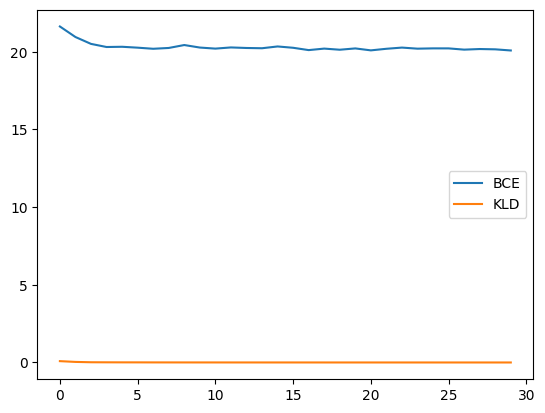

In [127]:
# Define the dimensions
feature_dim = 69  # as you have 68 features
hidden_dim = 512  # you can choose this
latent_dim = 30  # this will be the size of your lower-dimensional representation
epochs = 30

# Initialize the model and the optimizer
model = VAERNN(feature_dim, hidden_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0012)

model.train()
bce_array = []
kld_array = []
for epoch in range(epochs):
    train_loss = 0
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        recon_batch = recon_batch.permute(1, 0, 2)  # rearrange dimensions to match the input
        loss, bce, kld = vae_rnn_loss(recon_batch, data, mu, logvar)
        loss.backward()
        
        train_loss += loss.item()
        optimizer.step()
    
    bce_array.append(bce.detach().numpy())
    kld_array.append(kld.detach().numpy())

    print(f"Epoch {epoch}, Loss: {train_loss / len(train_loader_vae.dataset)}")

# Plot the loss
plt.plot(bce_array, label='BCE')
plt.plot(kld_array, label='KLD')
plt.legend()
plt.show()







(288, 30)


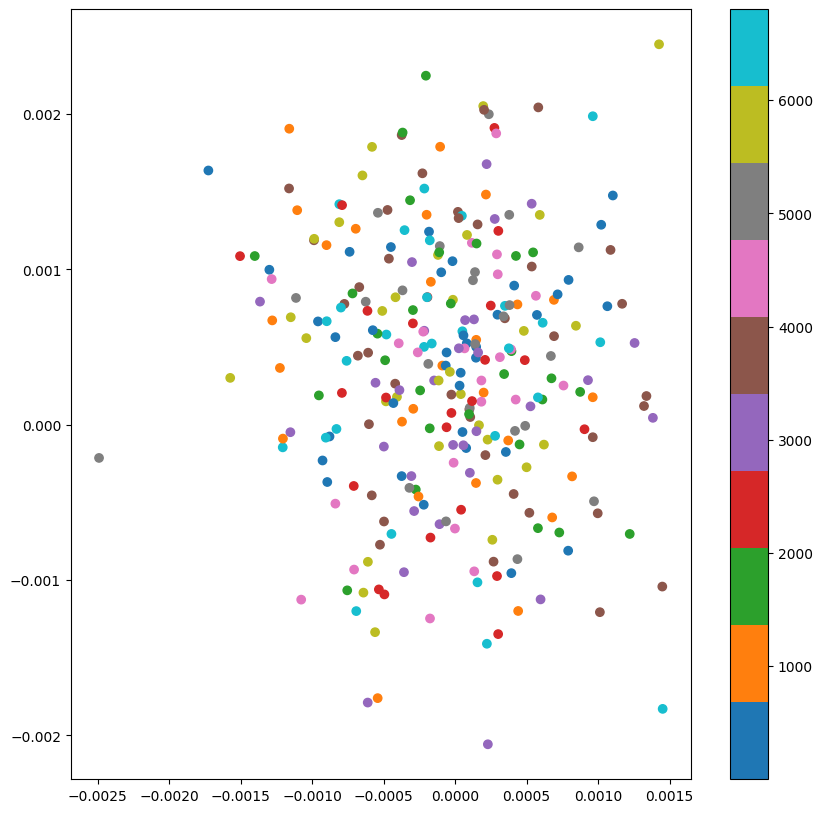

In [134]:
# Plot the latent representation  

# get the latent representation of the test data
latent = [] 
sbj_ids = []

model.eval()
with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        recon_batch, mu, logvar = model(data)
        latent_rep = mu.detach().numpy()
        latent.append(latent_rep)
        sbj_ids.append(labels.detach().numpy())

latent = np.concatenate(latent, axis=0)
print(latent.shape)

# plot the latent representation
plt.figure(figsize=(10, 10))
# each dot should have a annotation showing the subject id
plt.scatter(latent[:, 0], latent[:, 1], c=sbj_ids, cmap='tab10')
plt.colorbar()
plt.show()

sbj_ids = np.concatenate(sbj_ids, axis=0)




#

In [135]:
sbj_ids

array([6.940e+02, 4.116e+03, 1.173e+03, 3.801e+03, 3.920e+03, 2.368e+03,
       1.050e+02, 4.880e+03, 7.620e+02, 6.475e+03, 5.429e+03, 6.336e+03,
       5.450e+03, 1.876e+03, 6.132e+03, 1.334e+03, 5.414e+03, 3.024e+03,
       4.662e+03, 4.910e+02, 2.572e+03, 6.414e+03, 8.230e+02, 6.445e+03,
       6.416e+03, 2.251e+03, 1.395e+03, 1.672e+03, 5.463e+03, 3.630e+02,
       4.230e+03, 3.230e+02, 3.021e+03, 4.038e+03, 6.261e+03, 2.000e+00,
       2.836e+03, 3.717e+03, 1.951e+03, 3.311e+03, 1.607e+03, 2.216e+03,
       9.160e+02, 6.880e+02, 2.995e+03, 1.000e+01, 3.257e+03, 3.558e+03,
       1.328e+03, 3.541e+03, 5.295e+03, 2.190e+02, 1.995e+03, 4.345e+03,
       6.223e+03, 3.920e+02, 3.820e+02, 2.796e+03, 6.739e+03, 4.167e+03,
       1.162e+03, 4.760e+03, 1.250e+02, 3.223e+03, 4.622e+03, 4.731e+03,
       2.375e+03, 8.000e+02, 3.557e+03, 5.827e+03, 5.810e+03, 1.704e+03,
       3.736e+03, 5.789e+03, 4.016e+03, 3.542e+03, 1.703e+03, 2.040e+03,
       6.616e+03, 1.501e+03, 5.308e+03, 4.190e+02, 

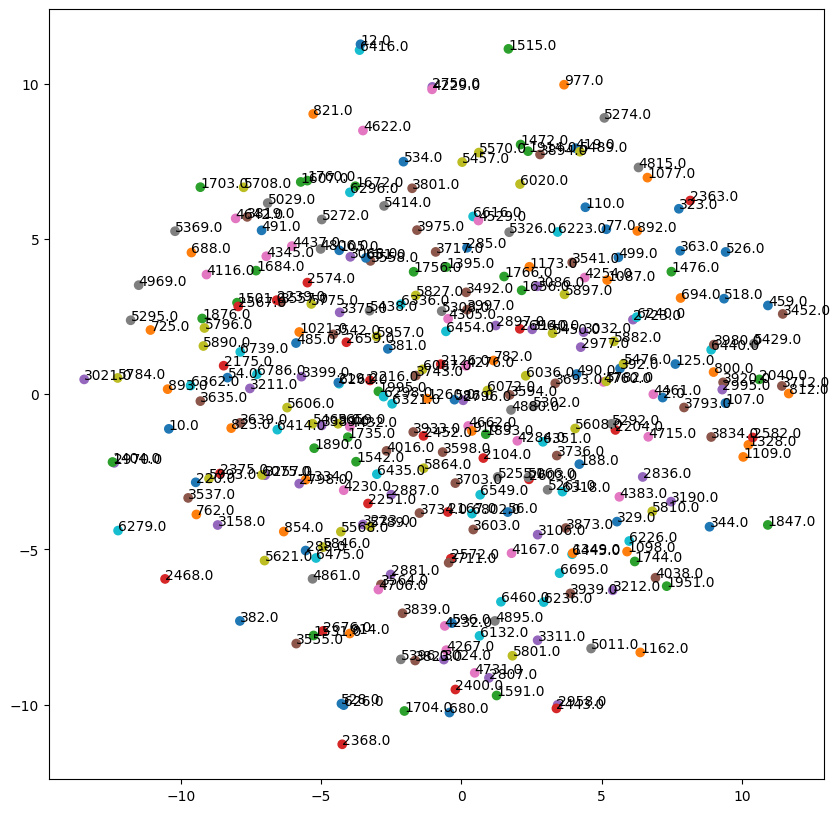

In [136]:
# plot latent representation using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
latent_tsne = tsne.fit_transform(latent)
plt.figure(figsize=(10, 10))
# each dot should have a annotation showing the subject id (not colorcoded but labeled)
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=sbj_ids, cmap='tab10')
for i, txt in enumerate(sbj_ids):
    plt.annotate(txt, (latent_tsne[i, 0], latent_tsne[i, 1]))



plt.show()


torch.Size([32, 300, 69])
(32, 300, 69)


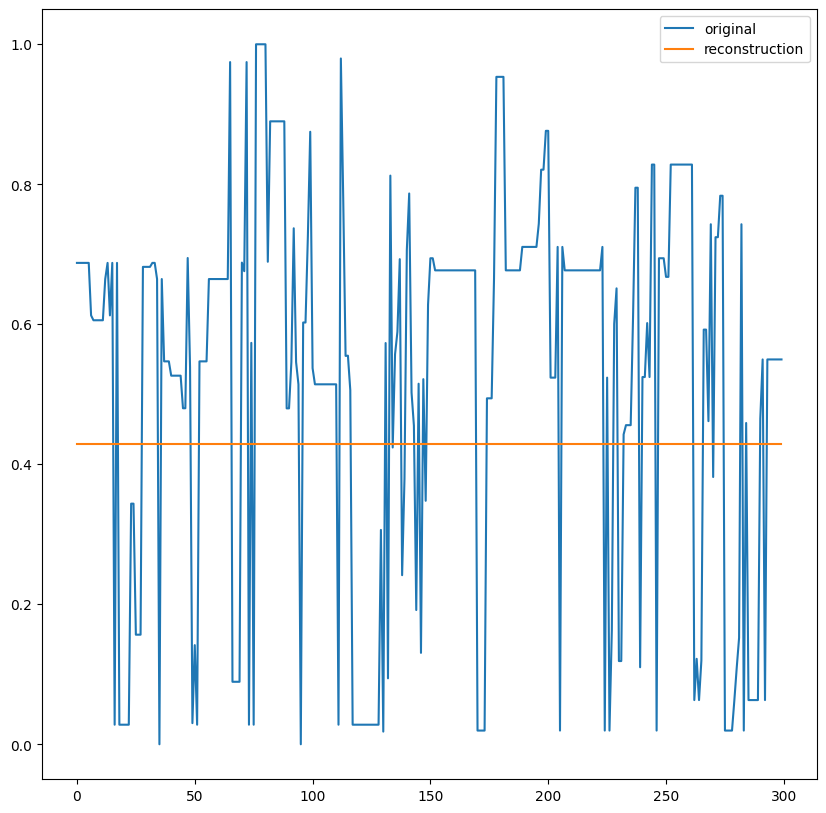

In [141]:
# Show the reconstruction of the test data
model.eval()
with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        print(data.shape)
        recon_batch, mu, logvar = model(data)
        recon_batch = recon_batch.permute(1, 0, 2)
        recon_batch = recon_batch.detach().numpy()
        print(recon_batch.shape)
        data = data.detach().numpy()
        break

# plot the reconstruction of the test data
plt.figure(figsize=(10, 10))
plt.plot(data[0, :, 8], label='original')
plt.plot(recon_batch[0, :, 8], label='reconstruction')
plt.legend()
plt.show()


In [227]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable



class LSTM_VAE(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_layers, latent_dim):
        super(LSTM_VAE, self).__init__()

        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.relu = nn.LeakyReLU()

        # encoder: LSTM layer and a linear layer
        self.lstm1 = nn.LSTM(feature_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, latent_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)

        # decoder: linear layer and LSTM layer
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.lstm2 = nn.LSTM(hidden_dim, feature_dim, num_layers=num_layers, batch_first=True)

        # Xavier/Glorot initialization
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

    def encode(self, x):
        _, (h_n, _) = self.lstm1(x)
        h_n = self.relu(h_n[-1])  # take the last hidden state
        return self.fc1(h_n), self.fc2(h_n)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        z = self.relu(self.fc3(z))
        z = z.unsqueeze(1).repeat(1, sequence_length, 1)  # repeat along sequence
        out, _ = self.lstm2(z)
        return out

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.mse_loss(recon_x, x, reduction='sum')  # use mean squared error loss
    KLD = -0.8 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD, BCE, KLD




Epoch 0, Loss: 2767.181735568576
Epoch 1, Loss: 1414.6589762369792
Epoch 2, Loss: 852.4386867947048
Epoch 3, Loss: 617.8257649739584
Epoch 4, Loss: 546.6126912434896
Epoch 5, Loss: 536.7694430881077
Epoch 6, Loss: 533.8857218424479
Epoch 7, Loss: 530.8825378417969
Epoch 8, Loss: 529.9444105360243
Epoch 9, Loss: 528.2590908474392
Epoch 10, Loss: 527.9901190863716
Epoch 11, Loss: 526.8779635959202
Epoch 12, Loss: 526.4262424045139
Epoch 13, Loss: 525.6024983723959
Epoch 14, Loss: 525.4534030490452
Epoch 15, Loss: 525.3397725423177
Epoch 16, Loss: 523.1475592719185
Epoch 17, Loss: 522.5235324435764
Epoch 18, Loss: 520.7525770399305
Epoch 19, Loss: 522.3200480143229


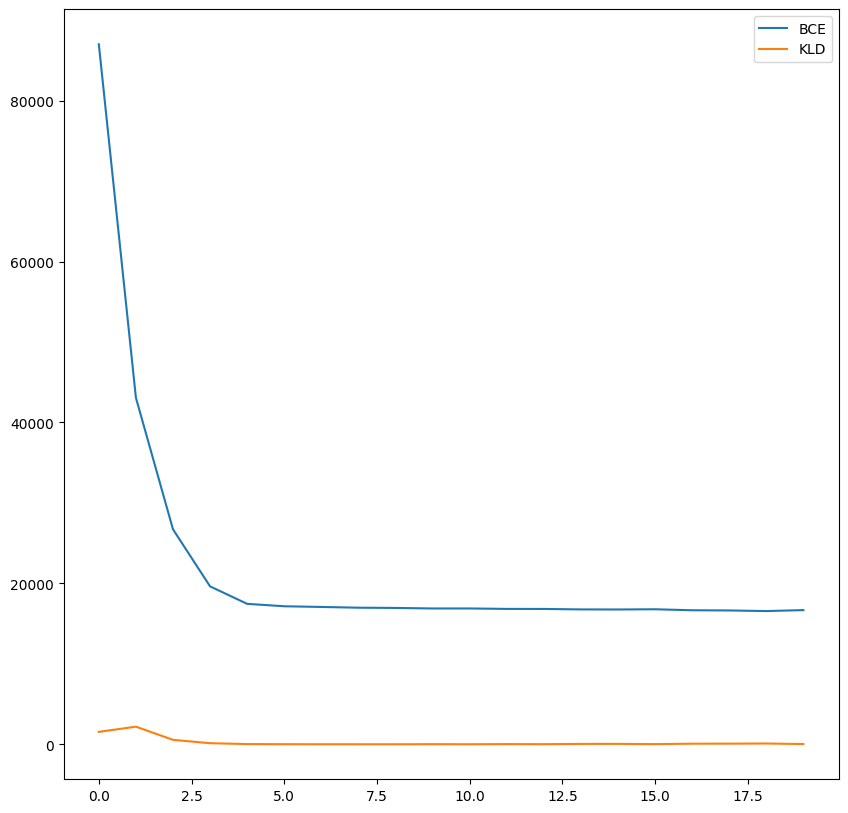

In [229]:
# Initialize the model and the optimizer



# dimensions
sequence_length = 300
feature_dim = 69  # as you have 68 features
hidden_dim = 600  # adjust this
latent_dim = 300  # this will be the size of your lower-dimensional representation
num_layers = 2

model = LSTM_VAE(hidden_dim=hidden_dim, latent_dim=latent_dim, feature_dim=feature_dim, num_layers=num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
model.train()

epochs = 20
bce_epochs = []
kld_epochs = []
for epoch in range(epochs):
    train_loss = 0
    bce_array = []
    kld_array = []
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
       #data = data.permute(1, 0, 2)  # rearrange dimensions to [sequence_length, batch_size, feature_dim]
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss, bce, kld = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        # apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        bce_array.append(bce.detach().numpy())
        kld_array.append(kld.detach().numpy())
    bce_epochs.append(np.mean(bce_array))
    kld_epochs.append(np.mean(kld_array))
    print(f"Epoch {epoch}, Loss: {train_loss / len(train_loader_vae.dataset)}")

# plot the loss
plt.figure(figsize=(10, 10))
plt.plot(bce_epochs, label='BCE')
plt.plot(kld_epochs, label='KLD')
plt.legend()

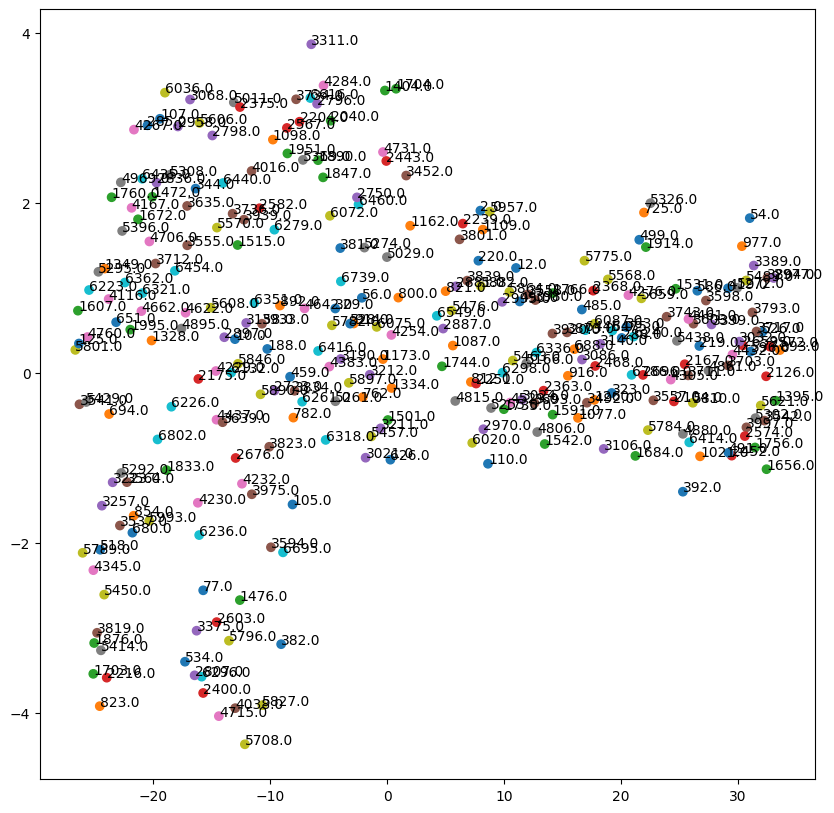

In [231]:
# plot the latent representation
latent = []
sbj_ids = []
model.eval()
with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        recon_batch, mu, logvar = model(data)
        mu = mu.detach().numpy()
        latent.append(mu)
        sbj_ids.append(labels.detach().numpy())
latent = np.concatenate(latent, axis=0)
sbj_ids = np.concatenate(sbj_ids, axis=0)

# plot latent representation using t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
latent_tsne = tsne.fit_transform(latent)
plt.figure(figsize=(10, 10))
# each dot should have a annotation showing the subject id (not colorcoded but labeled)
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=sbj_ids, cmap='tab10')
for i, txt in enumerate(sbj_ids):
    plt.annotate(txt, (latent_tsne[i, 0], latent_tsne[i, 1]))

plt.show()


torch.Size([32, 300, 69])
(32, 300, 69)


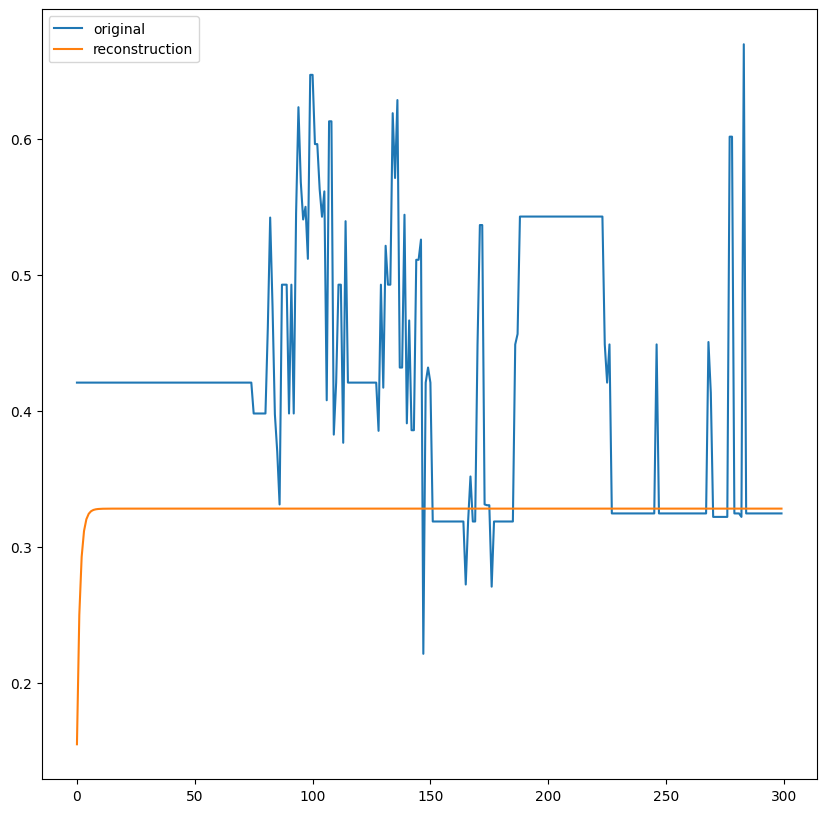

In [230]:
# Show the reconstruction of the test data
model.eval()
with torch.no_grad():
    
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        print(data.shape)
        recon_batch, mu, logvar = model(data)
        
        recon_batch = recon_batch.detach().numpy()
        print(recon_batch.shape)
        data = data.detach().numpy()
        break

# plot the reconstruction of the test data
plt.figure(figsize=(10, 10))
plt.plot(data[1, :, 8], label='original')
plt.plot(recon_batch[1, :, 8], label='reconstruction')
plt.legend()
plt.show()


In [197]:
recon_batch.shape

(32, 300, 69)

## Try a separate LSTM for each feature ##

In [242]:
class multi_LSTM_VAE(nn.Module):
    def __init__(self, feature_dim, hidden_dim, latent_dim, num_layers):
        super(multi_LSTM_VAE, self).__init__()

        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.feature_dim = feature_dim

        # encoder: LSTM layer and a linear layer
        self.lstm1 = nn.ModuleList([nn.LSTM(1, hidden_dim, batch_first=True) for _ in range(feature_dim)])
        self.fc1 = nn.Linear(hidden_dim * feature_dim, latent_dim)
        self.fc2 = nn.Linear(hidden_dim * feature_dim, latent_dim)

        # decoder: linear layer and LSTM layer
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.lstm2 = nn.ModuleList([nn.LSTM(hidden_dim, 1, batch_first=True) for _ in range(feature_dim)])

    def encode(self, x):
        h_n = []
        for i in range(self.feature_dim):
            _, (h, _) = self.lstm1[i](x[:, :, i].unsqueeze(-1))
            h_n.append(h[-1])  # take the last hidden state
        h_n = torch.cat(h_n, dim=-1)
        return self.fc1(h_n), self.fc2(h_n)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def decode(self, z):
        z = self.fc3(z)
        out = []
        for i in range(self.feature_dim):
            z_feature = z.unsqueeze(1).repeat(1, sequence_length, 1)  # repeat along sequence
            out_feature, _ = self.lstm2[i](z_feature)
            out.append(out_feature)
        out = torch.cat(out, dim=-1)
        return out

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

Epoch 0, Loss: 6252.193196614583
Epoch 1, Loss: 4871.315104166667
Epoch 2, Loss: 3645.0574001736113
Epoch 3, Loss: 3069.8619520399307
Epoch 4, Loss: 2904.357666015625
Epoch 5, Loss: 2639.036431206597
Epoch 6, Loss: 2293.0984700520835
Epoch 7, Loss: 2205.1698133680557
Epoch 8, Loss: 2154.2641872829863
Epoch 9, Loss: 2093.8193630642363
Epoch 10, Loss: 2051.0699462890625
Epoch 11, Loss: 2042.145751953125
Epoch 12, Loss: 2034.23193359375
Epoch 13, Loss: 2027.8959011501736
Epoch 14, Loss: 1991.7985161675347
Epoch 15, Loss: 1959.1863878038193
Epoch 16, Loss: 1949.064208984375
Epoch 17, Loss: 1927.2805311414932
Epoch 18, Loss: 1854.5318603515625
Epoch 19, Loss: 1795.6932508680557


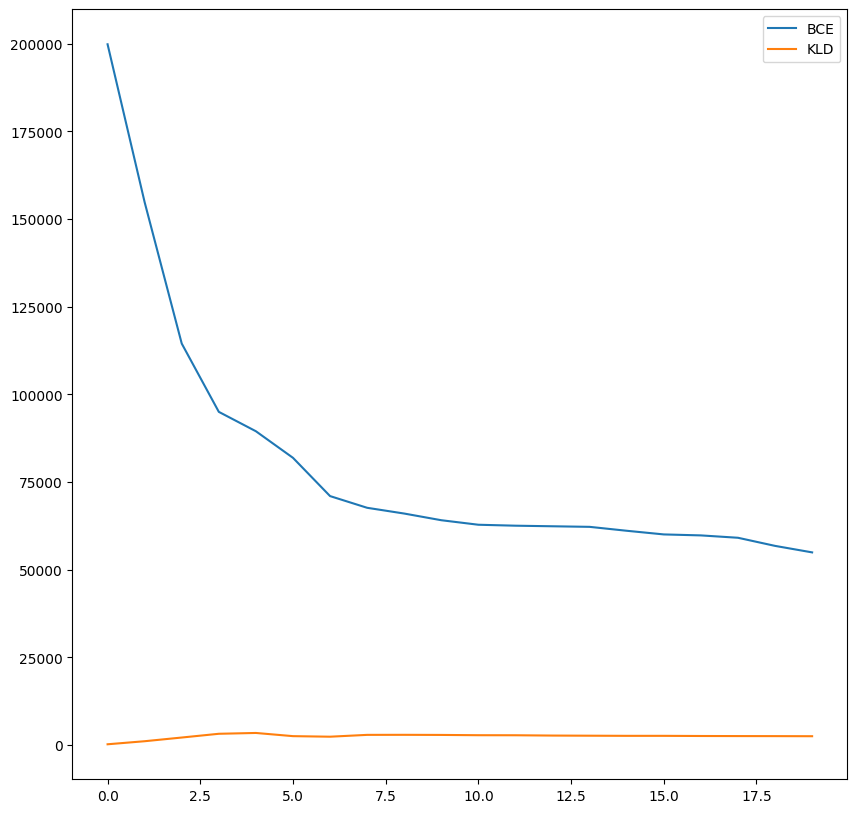

In [243]:
# dimensions
sequence_length = 300
feature_dim = 69  # as you have 68 features
hidden_dim = 128 # adjust this
latent_dim = 20  # this will be the size of your lower-dimensional representation
num_layers = 2

model = multi_LSTM_VAE(hidden_dim=hidden_dim, latent_dim=latent_dim, feature_dim=feature_dim, num_layers=num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
model.train()

epochs = 20
bce_epochs = []
kld_epochs = []
for epoch in range(epochs):
    train_loss = 0
    bce_array = []
    kld_array = []
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
       #data = data.permute(1, 0, 2)  # rearrange dimensions to [sequence_length, batch_size, feature_dim]
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss, bce, kld = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        # apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        bce_array.append(bce.detach().numpy())
        kld_array.append(kld.detach().numpy())
    bce_epochs.append(np.mean(bce_array))
    kld_epochs.append(np.mean(kld_array))
    print(f"Epoch {epoch}, Loss: {train_loss / len(train_loader_vae.dataset)}")

# plot the loss
plt.figure(figsize=(10, 10))
plt.plot(bce_epochs, label='BCE')
plt.plot(kld_epochs, label='KLD')
plt.legend()
plt.show()


torch.Size([32, 300, 69])
(32, 300, 69)


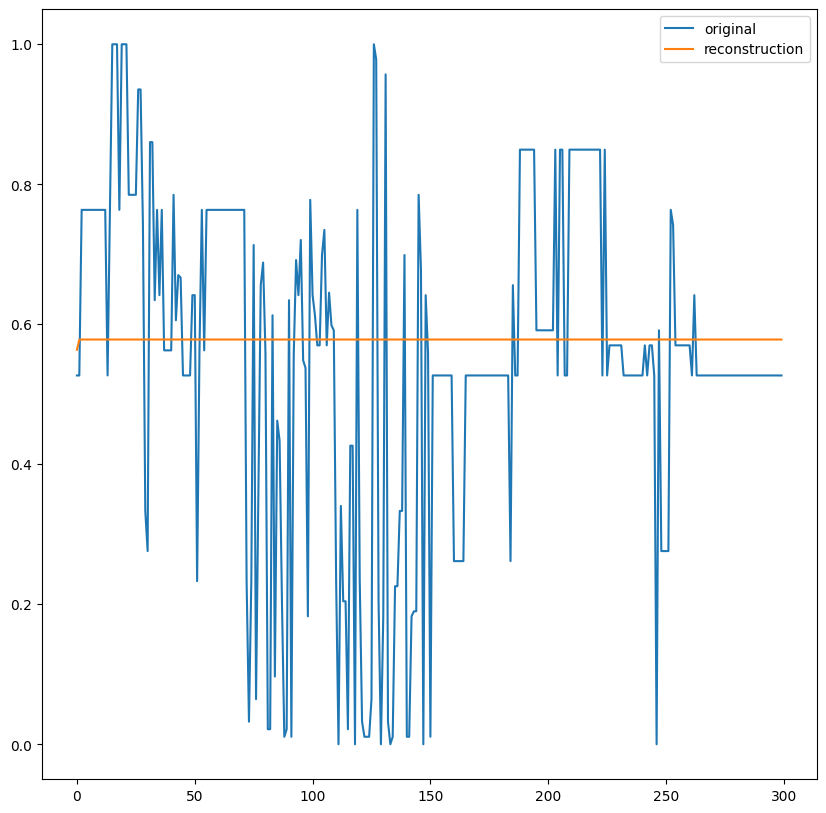

In [247]:
# Show the reconstruction of the test data
model.eval()
with torch.no_grad():
    
    for batch_idx, (data, labels) in enumerate(train_loader_vae):
        print(data.shape)
        recon_batch, mu, logvar = model(data)
        
        recon_batch = recon_batch.detach().numpy()
        print(recon_batch.shape)
        data = data.detach().numpy()
        break

# plot the reconstruction of the test data
plt.figure(figsize=(10, 10))
plt.plot(data[1, :, 19], label='original')
plt.plot(recon_batch[1, :, 19], label='reconstruction')
plt.legend()
plt.show()

# Experimentation with another loss function (CTC) #

In [186]:
# New loss function with CTC
def loss_function_ctc(recon_x, x, mu, logvar, input_lengths, target_lengths):
    BCE = F.mse_loss(recon_x, x, reduction='sum')  # use mean squared error loss
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    # Prepare target for CTC loss
    target = torch.flatten(x.long(), end_dim=-2)  # flattening all but last dimension

    # Add CTC loss
    CTC = F.ctc_loss(recon_x.log_softmax(2), target, input_lengths, target_lengths)

    return BCE + KLD + CTC, BCE, KLD, CTC

In [187]:
# Initialize the model and the optimizer
model = LSTM_VAE()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.train()

bce_epochs = []
kld_epochs = []
for epoch in range(epochs):
    train_loss = 0
    bce_array = []
    kld_array = []
    for batch_idx, data in enumerate(train_loader_vae):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        
        # Assume `inputs` is your input batch and `targets` are your target sequences
        input_lengths = torch.full(size=(data.shape[0],), fill_value=300, dtype=torch.long)
        target_lengths = torch.full(size=(data.shape[0],), fill_value=300, dtype=torch.long)  # replace `target_sequence_length` with actual lengths

        loss, bce, kld, ctc = loss_function_ctc(recon_batch, data, mu, logvar, input_lengths, target_lengths)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        bce_array.append(bce.detach().numpy())
        kld_array.append(kld.detach().numpy())
        
    bce_epochs.append(np.mean(bce_array))
    kld_epochs.append(np.mean(kld_array))
    print(f"Epoch {epoch}, Loss: {train_loss / len(train_loader_vae.dataset)}")

# plot the loss
plt.figure(figsize=(10, 10))
plt.plot(bce_epochs, label='BCE')
plt.plot(kld_epochs, label='KLD')
plt.legend()

AttributeError: 'list' object has no attribute 'dim'

## Let's try only extracting 5 minutes prior to the sleep onset ##

In [256]:
# Create a function for creating sliding windows of selected length 

def create_sliding_windows_VAE(data, window_size_minutes= 30, random_seed = 42):

    # Assert whether therea are any NaNs in the data
    assert data.isnull().sum().sum() == 0, "There are NaNs in the data"

    # Create a list of all unique subjects
    subjects = data['Sbj_ID'].unique()


    # Randomly select some of the 80% of subjects to be in the training set, 20% to the validation set and 20% in the test set
    np.random.seed(random_seed)
    train_subjects = np.random.choice(subjects, size=int(0.6*len(subjects)), replace=False)
    val_subjects = np.random.choice(np.setdiff1d(subjects, train_subjects), size=int(0.2*len(subjects)), replace=False)
    test_subjects = np.setdiff1d(subjects, np.concatenate((train_subjects, val_subjects)))
   
    
    # Create a new column in the dataframe that indicates whether the subject is in the training set, val set or the test set
    data['Set'] = 'train'
    data.loc[data['Sbj_ID'].isin(val_subjects), 'Set'] = 'val'
    data.loc[data['Sbj_ID'].isin(test_subjects), 'Set'] = 'test'

    # Sort your dataframe by Sbj_ID if not already sorted
    data = data.sort_values('Sbj_ID')


    # Convert the window size from minutes to 6-second epochs
    window_size = int((window_size_minutes*60)/6)

    # Create empty lists to store your sequences and labels
    train_sequences = []
    train_labels = []
    val_sequences = []
    val_labels = []
    test_sequences = []
    test_labels = []

    # Group the DataFrame by subject ID and iterate over each group, dividing into training and test sets
    for sbj_id, group in data.groupby('Sbj_ID'):

        #Sort the group by the label column (so it's descending)
        group = group.sort_values('Label', ascending=False)

        # For each group, get the feature columns and convert them into numpy array
        group_features = group.drop(['Sbj_ID', 'Label', 'ifCleanOnset', 'SleepStage', 'Set'], axis=1).to_numpy()

        train_test = group['Set'].iloc[0]
        
        if window_size == len(group_features):
            if train_test == 'train':
                train_sequences.append(group_features)
                train_labels.append(sbj_id)
            elif train_test == 'val':
                val_sequences.append(group_features)
                val_labels.append(sbj_id)
            elif train_test == 'test':
                test_sequences.append(group_features)
                test_labels.append(sbj_id)
        elif window_size > len(group_features):
            continue
        else:

            if train_test == 'train':

                # extract from the end of the sequneces the window size of data
                train_sequences.append(group_features[-window_size:])
               
            
                # Append the label corresponding to the end of the window
                train_labels.append(sbj_id)

            
            elif train_test == 'val':
                # Append the window data to your sequences
                val_sequences.append(group_features[-window_size:])

                # Append the label corresponding to the end of the window
                val_labels.append(sbj_id)

            elif train_test == 'test':
                # Append the window data to your sequences
                test_sequences.append(group_features[-window_size:])

                # Append the label corresponding to the end of the window
                test_labels.append(sbj_id)
            
    # Convert the sequences and labels into numpy arrays
    train_sequences = np.array(train_sequences)
    train_labels = np.array(train_labels)
    val_sequences = np.array(val_sequences)
    val_labels = np.array(val_labels)
    test_sequences = np.array(test_sequences)
    test_labels = np.array(test_labels)

    return train_sequences, train_labels, val_sequences, val_labels, test_sequences, test_labels

In [257]:
# Create the dataset from the dataframe
train_sequences_vae_5, train_labels_vae_5, val_sequences_vae_5, val_labels_vae_5, test_sequences_vae_5, test_labels_vae_5 = create_sliding_windows_VAE(df_for_encoding, window_size_minutes=5, random_seed=42)


In [253]:
train_sequences_vae_5 = torch.from_numpy(train_sequences_vae_5).float()

In [258]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the training data
# We're assuming here that your training data is a 3D array with shape 
# (number_of_sequences, sequence_length, number_of_features)
# and that you want to scale the data across all sequences and time steps, but not across features.
scaler.fit(train_sequences_vae_5.reshape(-1, train_sequences_vae_5.shape[-1]))

# Transform the training data
train_sequences_vae_5_scaled = scaler.transform(train_sequences_vae_5.reshape(-1, train_sequences_vae_5.shape[-1])).reshape(train_sequences_vae_5.shape)
val_sequences_vae_5_scaled = scaler.transform(val_sequences_vae_5.reshape(-1, val_sequences_vae_5.shape[-1])).reshape(val_sequences_vae_5.shape)
test_sequences_vae_5_scaled = scaler.transform(test_sequences_vae_5.reshape(-1, test_sequences_vae_5.shape[-1])).reshape(test_sequences_vae_5.shape)



In [262]:
# Check that the min and max values are 0 and 1 in the training, validation and test sets
print(train_sequences_vae_5_scaled.min(), train_sequences_vae_5_scaled.max())
print(val_sequences_vae_5_scaled.min(), val_sequences_vae_5_scaled.max())
print(test_sequences_vae_5_scaled.min(), test_sequences_vae_5_scaled.max())

0.0 1.0000000000000002
-0.12564879211402707 1.1520955909506145
-0.2367084850360104 1.3191196698762018


In [263]:

# Print the shape of the training, validation and test sets
print(train_sequences_vae_5_scaled.shape)
print(val_sequences_vae_5_scaled.shape)
print(test_sequences_vae_5_scaled.shape)



(390, 50, 69)
(131, 50, 69)
(132, 50, 69)


In [264]:
# Check the datatypes of the sequences and labels numpy arrays
print('Train sequences datatype:', train_sequences_vae_5_scaled.dtype)

Train sequences datatype: float64


In [265]:
from torch.utils.data import TensorDataset, DataLoader

# Create the training, validation and test sets
#train_dataset_vae = TensorDataset(torch.from_numpy(np.vstack(train_sequences_vae)).float(), torch.from_numpy(train_labels_vae).float())
##val_dataset_vae = TensorDataset(torch.from_numpy(val_sequences_vae).float(), torch.from_numpy(val_labels_vae).float())
#test_dataset_vae = TensorDataset(torch.from_numpy(test_sequences_vae).float(), torch.from_numpy(test_labels_vae).float())

train_dataset_vae_5 = SleepDataset(train_sequences_vae_5_scaled, train_labels_vae_5)
val_dataset_vae_5 = SleepDataset(val_sequences_vae_5_scaled, val_labels_vae_5)
test_dataset_vae_5 = SleepDataset(test_sequences_vae_5_scaled, test_labels_vae_5)

# Create the training, validation and test dataloaders
train_dataloader_vae_5 = DataLoader(train_dataset_vae_5, batch_size=64, shuffle=True)
val_dataloader_vae_5 = DataLoader(val_dataset_vae_5, batch_size=64, shuffle=True)
test_dataloader_vae_5 = DataLoader(test_dataset_vae_5, batch_size=64, shuffle=True)



In [266]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable



class LSTM_VAE(nn.Module):
    def __init__(self, feature_dim, hidden_dim, num_layers, latent_dim):
        super(LSTM_VAE, self).__init__()

        self.hidden_dim = hidden_dim
        self.latent_dim = latent_dim
        self.relu = nn.LeakyReLU()

        # encoder: LSTM layer and a linear layer
        self.lstm1 = nn.LSTM(feature_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_dim, latent_dim)
        self.fc2 = nn.Linear(hidden_dim, latent_dim)

        # decoder: linear layer and LSTM layer
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.lstm2 = nn.LSTM(hidden_dim, feature_dim, num_layers=num_layers, batch_first=True)

        # Xavier/Glorot initialization
        for name, param in self.named_parameters():
            if 'weight' in name:
                nn.init.xavier_normal_(param)
            elif 'bias' in name:
                nn.init.constant_(param, 0)

    def encode(self, x):
        _, (h_n, _) = self.lstm1(x)
        h_n = self.relu(h_n[-1])  # take the last hidden state
        return self.fc1(h_n), self.fc2(h_n)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        z = self.relu(self.fc3(z))
        z = z.unsqueeze(1).repeat(1, sequence_length, 1)  # repeat along sequence
        out, _ = self.lstm2(z)
        return out

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.mse_loss(recon_x, x, reduction='sum')  # use mean squared error loss
    KLD = -0.8 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD, BCE, KLD

Epoch 0, Loss: 504.4125
Epoch 1, Loss: 272.6127184745593
Epoch 2, Loss: 155.53885231996193
Epoch 3, Loss: 121.38556831555489
Epoch 4, Loss: 112.42732450045072
Epoch 5, Loss: 108.08908394055489
Epoch 6, Loss: 105.37572209284856
Epoch 7, Loss: 103.60703719701523
Epoch 8, Loss: 102.42979501577524
Epoch 9, Loss: 100.95443662985777
Epoch 10, Loss: 99.06842400966546
Epoch 11, Loss: 97.75572822766426
Epoch 12, Loss: 98.14446270282451
Epoch 13, Loss: 95.85344739082532
Epoch 14, Loss: 94.94161032652244
Epoch 15, Loss: 94.6786619528746
Epoch 16, Loss: 94.30789403670873
Epoch 17, Loss: 93.88240998096956
Epoch 18, Loss: 95.28934263571715
Epoch 19, Loss: 94.17672275641026
Epoch 20, Loss: 94.23643298026843
Epoch 21, Loss: 93.18572747646233
Epoch 22, Loss: 93.01933781550481
Epoch 23, Loss: 93.83534858899239
Epoch 24, Loss: 92.76292662009214
Epoch 25, Loss: 92.86112467447917
Epoch 26, Loss: 93.10467435396635
Epoch 27, Loss: 92.84783825996594
Epoch 28, Loss: 92.25651558117988
Epoch 29, Loss: 92.4600615

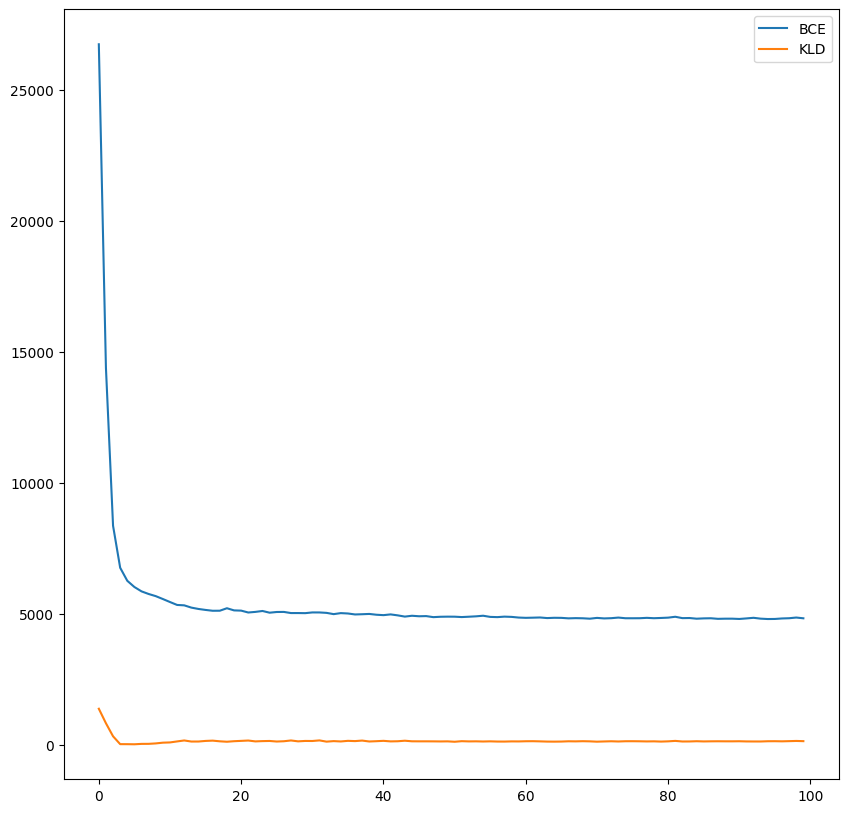

In [272]:
# Initialize the model and the optimizer


# dimensions
sequence_length = 50
feature_dim = 69  # as you have 68 features
hidden_dim = 1024  # adjust this
latent_dim = 50  # this will be the size of your lower-dimensional representation
num_layers = 2

model = LSTM_VAE(hidden_dim=hidden_dim, latent_dim=latent_dim, feature_dim=feature_dim, num_layers=num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
model.train()

epochs = 100
bce_epochs = []
kld_epochs = []
for epoch in range(epochs):
    train_loss = 0
    bce_array = []
    kld_array = []
    for batch_idx, (data, labels) in enumerate(train_dataloader_vae_5):
       #data = data.permute(1, 0, 2)  # rearrange dimensions to [sequence_length, batch_size, feature_dim]
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss, bce, kld = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        # apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
        optimizer.step()
        bce_array.append(bce.detach().numpy())
        kld_array.append(kld.detach().numpy())
    bce_epochs.append(np.mean(bce_array))
    kld_epochs.append(np.mean(kld_array))
    print(f"Epoch {epoch}, Loss: {train_loss / len(train_dataloader_vae_5.dataset)}")

# plot the loss
plt.figure(figsize=(10, 10))
plt.plot(bce_epochs, label='BCE')
plt.plot(kld_epochs, label='KLD')
plt.legend()

torch.Size([64, 50, 69])
(64, 50, 69)


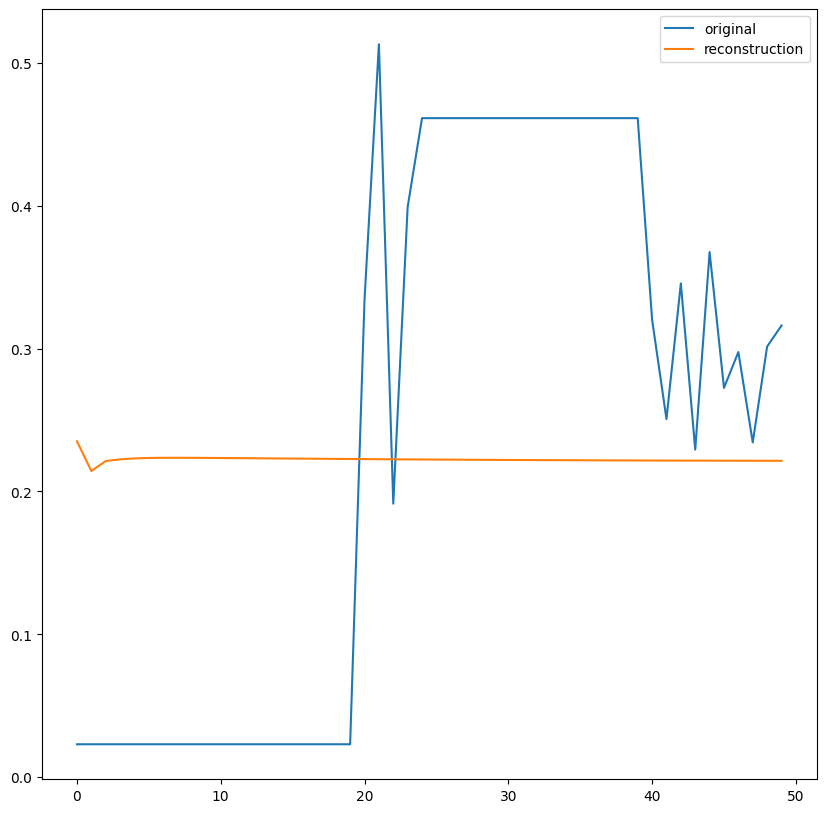

In [275]:
# Show the reconstruction of the test data
model.eval()
with torch.no_grad():
    
    for batch_idx, (data, labels) in enumerate(train_dataloader_vae_5):
        print(data.shape)
        recon_batch, mu, logvar = model(data)
        
        recon_batch = recon_batch.detach().numpy()
        print(recon_batch.shape)
        data = data.detach().numpy()
        break

# plot the reconstruction of the test data
plt.figure(figsize=(10, 10))
plt.plot(data[1, :, 31], label='original')
plt.plot(recon_batch[1, :, 31], label='reconstruction')
plt.legend()
plt.show()